In [70]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [71]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [72]:
#Start with spring and work our way down to winter
season = 1
season_year = 2005
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2005-03-01 to 2005-05-31
Columns: 300 entries, 10000009 to 25000592
dtypes: float64(300)
memory usage: 216.3 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2005-03-01  0.816234  0.684571  0.776127  0.853781  0.597697  1.328049   
2005-03-02  0.790543  0.676690  0.762484  0.853132  0.543619  1.320626   
2005-03-03  0.810479  0.672279  0.609815  0.860932  0.570953  1.275047   
2005-03-04  0.765888  0.646340  0.603655  0.811644  0.558527  1.182022   
2005-03-05  0.755918  0.643820  0.600575  0.793789  0.541580  1.149312   
...              ...       ...       ...       ...       ...       ...   
2005-05-27  0.625851  0.586392  0.355756  0.654146  0.541012  0.604929   
2005-05-28  0.601691  0.570440  0.342728  0.651759  0.531929  0.595076   
2005-05-29  0.580338  0.550543  0.335429  0.633626  0.508780  0.569964   
2005-05-30  0.556956  0.529930  0.324618  0.616422  0.508822  0.565025   
2005-05-31  0.661132  0.825392  0.413226  0.856223  0.726101  0.562203   

            11000016  13000011  13000019  13000065  ...  66000014  67000017  \
2005-03-01  1.065994  1.008229  

          2005-03-01  2005-03-02  2005-03-03  2005-03-04  2005-03-05  \
10000009   -0.074174   -0.073937   -0.069928   -0.072502   -0.066422   
10000010   -0.084884   -0.083220   -0.081250   -0.082454   -0.075863   
10000011   -0.077436   -0.076225   -0.086368   -0.086007   -0.079505   
10000014   -0.071120   -0.068834   -0.065795   -0.068694   -0.063233   
10000016   -0.091950   -0.094070   -0.089552   -0.089763   -0.084474   
...              ...         ...         ...         ...         ...   
8000001    -0.084986   -0.097599   -0.052834   -0.060309   -0.065432   
9000001    -0.006977   -0.008684   -0.009356   -0.009372   -0.004192   
9000015    -0.011701   -0.013058   -0.013464   -0.013363   -0.008017   
22000047   -0.099289   -0.097671   -0.096462   -0.095750   -0.089915   
25000592   -0.028607   -0.039022   -0.029746   -0.050765   -0.043449   

          2005-03-06  2005-03-07  2005-03-08  2005-03-09  2005-03-10  ...  \
10000009   -0.065022   -0.063150   -0.060988   -0.059523  

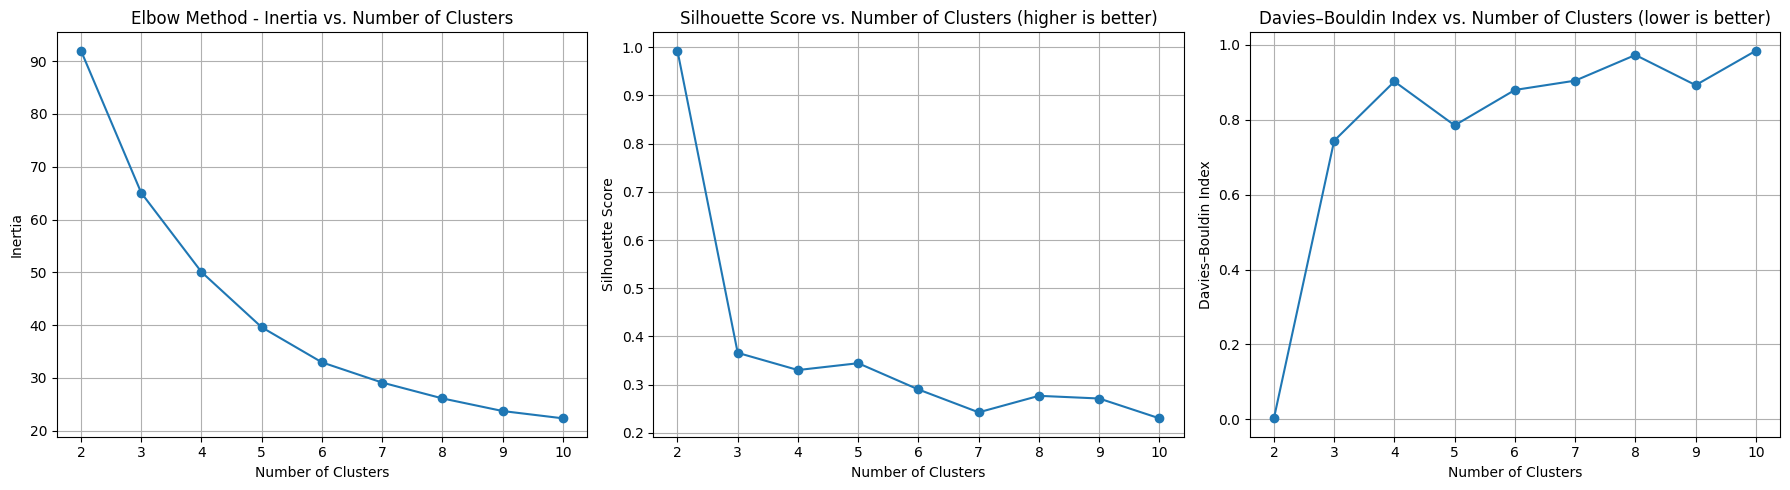

In [73]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2005-03-01  0.816234  0.684571  0.776127  0.853781  0.597697  1.328049   
2005-03-02  0.790543  0.676690  0.762484  0.853132  0.543619  1.320626   
2005-03-03  0.810479  0.672279  0.609815  0.860932  0.570953  1.275047   
2005-03-04  0.765888  0.646340  0.603655  0.811644  0.558527  1.182022   
2005-03-05  0.755918  0.643820  0.600575  0.793789  0.541580  1.149312   
...              ...       ...       ...       ...       ...       ...   
2005-05-27  0.625851  0.586392  0.355756  0.654146  0.541012  0.604929   
2005-05-28  0.601691  0.570440  0.342728  0.651759  0.531929  0.595076   
2005-05-29  0.580338  0.550543  0.335429  0.633626  0.508780  0.569964   
2005-05-30  0.556956  0.529930  0.324618  0.616422  0.508822  0.565025   
2005-05-31  0.661132  0.825392  0.413226  0.856223  0.726101  0.562203   

            11000016  13000011  13000019  13000065  ...  66000014  67000017  \
2005-03-01  1.065994  1.008229  

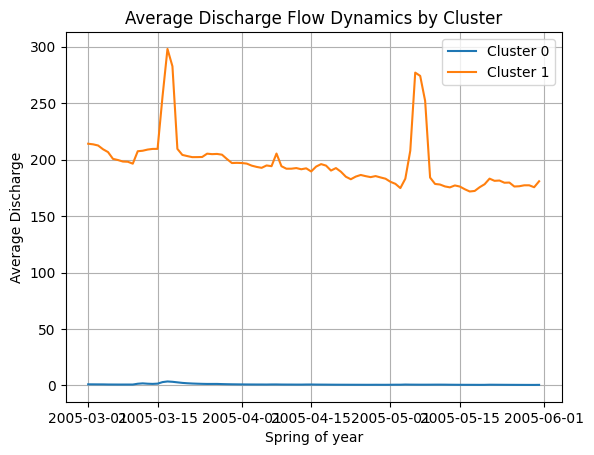

In [74]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [75]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
#print(out_path)

In [76]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2005-03-01  0.816234  0.684571  0.776127  0.853781  0.597697  1.328049   
2005-03-02  0.790543  0.676690  0.762484  0.853132  0.543619  1.320626   
2005-03-03  0.810479  0.672279  0.609815  0.860932  0.570953  1.275047   
2005-03-04  0.765888  0.646340  0.603655  0.811644  0.558527  1.182022   
2005-03-05  0.755918  0.643820  0.600575  0.793789  0.541580  1.149312   
...              ...       ...       ...       ...       ...       ...   
2005-05-27  0.625851  0.586392  0.355756  0.654146  0.541012  0.604929   
2005-05-28  0.601691  0.570440  0.342728  0.651759  0.531929  0.595076   
2005-05-29  0.580338  0.550543  0.335429  0.633626  0.508780  0.569964   
2005-05-30  0.556956  0.529930  0.324618  0.616422  0.508822  0.565025   
2005-05-31  0.661132  0.825392  0.413226  0.856223  0.726101  0.562203   

            11000016  13000011  13000019  13000065  ...  66000014  67000017  \
2005-03-01  1.065994  1.008229  0.792710  1.821070  ...  1.270115  0.978045   
2005-03-02  1.009267  1.000369  0.788474  1.801757  ...  1.096153  0.799360   
2005-03-03  0.960914  0.952078  0.781742  1.778826  ...  0.985664  0.808002   
2005-03-04  0.935398  0.916709  0.769207  1.747382  ...  1.139964  0.889323   
2005-03-05  0.910219  0.869476  0.760342  1.721701  ...  0.949512  0.748711   
...              ...       ...       ...       ...  ...       ...       ...   
2005-05-27  0.658149  0.328217  0.575034  0.865316  ...  0.164298  0.149742   
2005-05-28  0.634490  0.317788  0.560975  0.879962  ...  0.152620  0.128391   
2005-05-29  0.614618  0.305242  0.552935  0.856116  ...  0.143624  0.113123   
2005-05-30  0.611226  0.296476  0.549747  0.832569  ...  0.138769  0.103576   
2005-05-31  0.622087  0.374770  0.598798  0.887081  ...  0.142701  0.102508   

            67000018  67000019   7000003   8000001   9000001   9000015  \
2005-03-01  1.853805  1.633212  0.610068  0.683320  1.642339  1.584269   
2005-03-02  1.312433  1.363733  0.587491  0.500335  1.590868  1.537212   
2005-03-03  1.057152  1.592938  0.735745  1.019135  1.549822  1.499686   
2005-03-04  1.263082  1.187198  0.695218  0.912373  1.524301  1.476353   
2005-03-05  1.013225  1.318569  0.536738  0.767679  1.494833  1.449412   
...              ...       ...       ...       ...       ...       ...   
2005-05-27  0.129451  0.234415  0.336760  0.503565  1.001494  0.998374   
2005-05-28  0.114926  0.205017  0.316779  0.484953  0.978233  0.977108   
2005-05-29  0.104229  0.182268  0.306535  0.470644  0.936297  0.938768   
2005-05-30  0.098447  0.167747  0.294301  0.456116  0.870854  0.878936   
2005-05-31  0.103089  0.166431  0.362166  0.469689  0.785058  0.800497   

            22000047  25000592  
2005-03-01  0.507479  1.376427  
2005-03-02  0.499449  1.218773  
2005-03-03  0.486602  1.300948  
2005-03-04  0.486602  1.027032  
2005-03-05  0.476966  1.028706  
...              ...       ...  
2005-05-27  0.451271  0.957336  
2005-05-28  0.451271  0.941053  
2005-05-29  0.440029  0.925075  
2005-05-30  0.435212  0.908792  
2005-05-31  0.467331  1.163381  

[92 rows x 300 columns]

<Axes: >

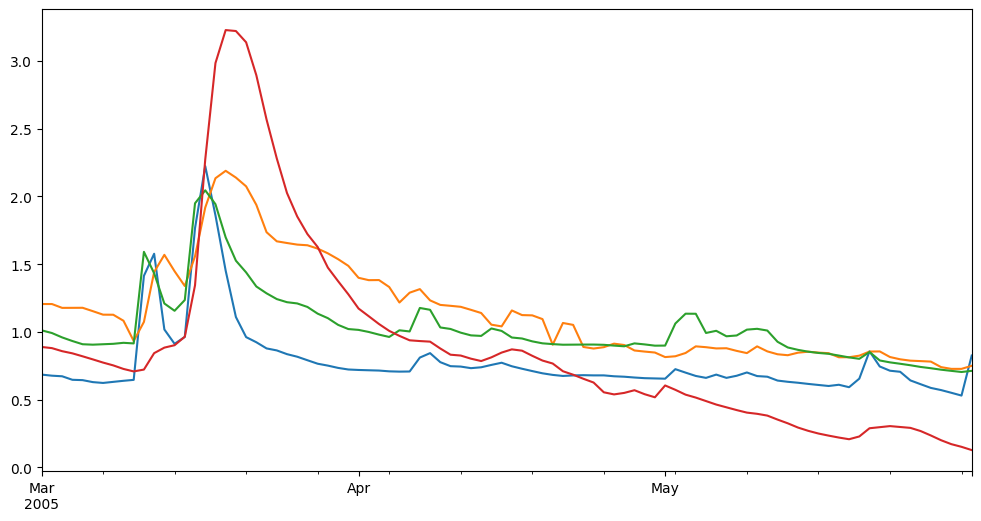

In [77]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

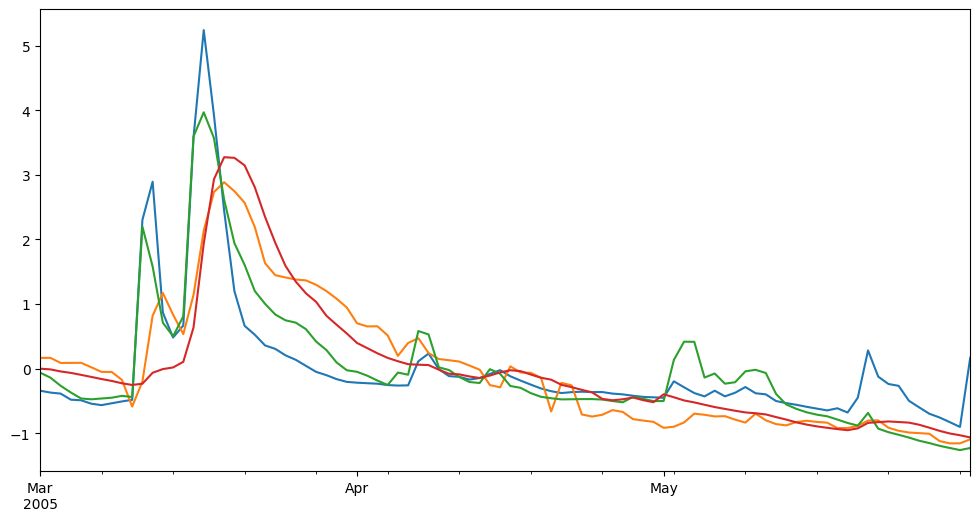

In [78]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

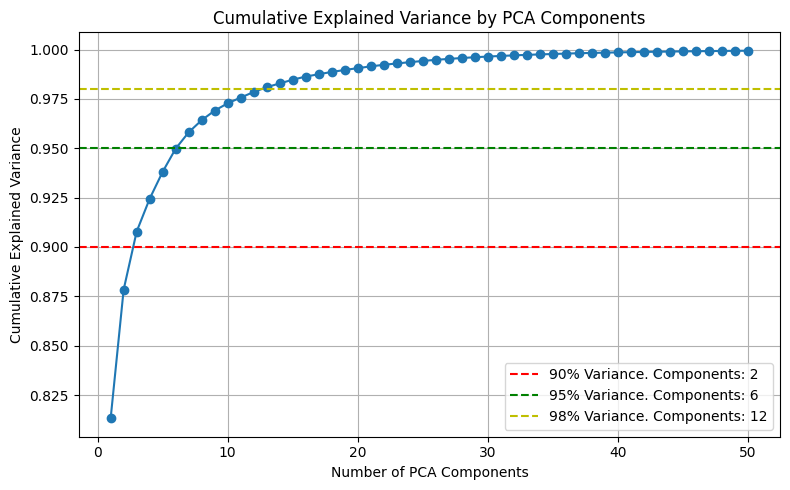

In [79]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [80]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[  2.01075638,   1.60310146,   3.27585167, ...,  -0.83814737,
         -0.83193008,  -0.97247833],
       [  1.27325584,   1.72909782,   3.36542273, ...,  -0.86781848,
         -0.99636145,  -1.04103605],
       [  0.47982614,   1.32585882,   2.80757788, ...,   0.12701396,
         -0.36105963,   0.28588229],
       ...,
       [-13.56376418,  -1.8118907 ,  -3.63187337, ...,   0.34194668,
         -0.25501095,   0.02814741],
       [-13.90813011,  -1.86237241,  -3.73522307, ...,   0.30073494,
         -0.2853528 ,  -0.07520558],
       [-11.30768187,  -4.18932124,  -3.32409444, ...,  -0.86284233,
          0.32400794,  -0.31242086]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_52112\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


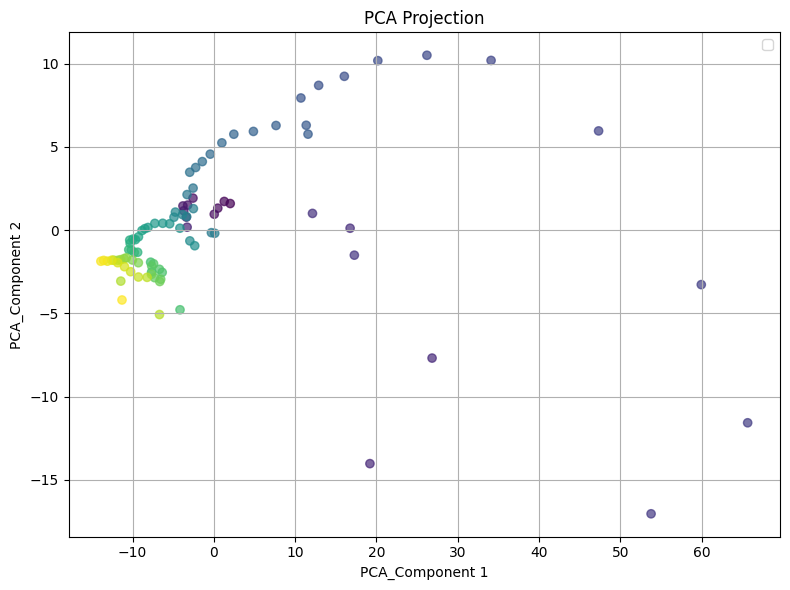

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_52112\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


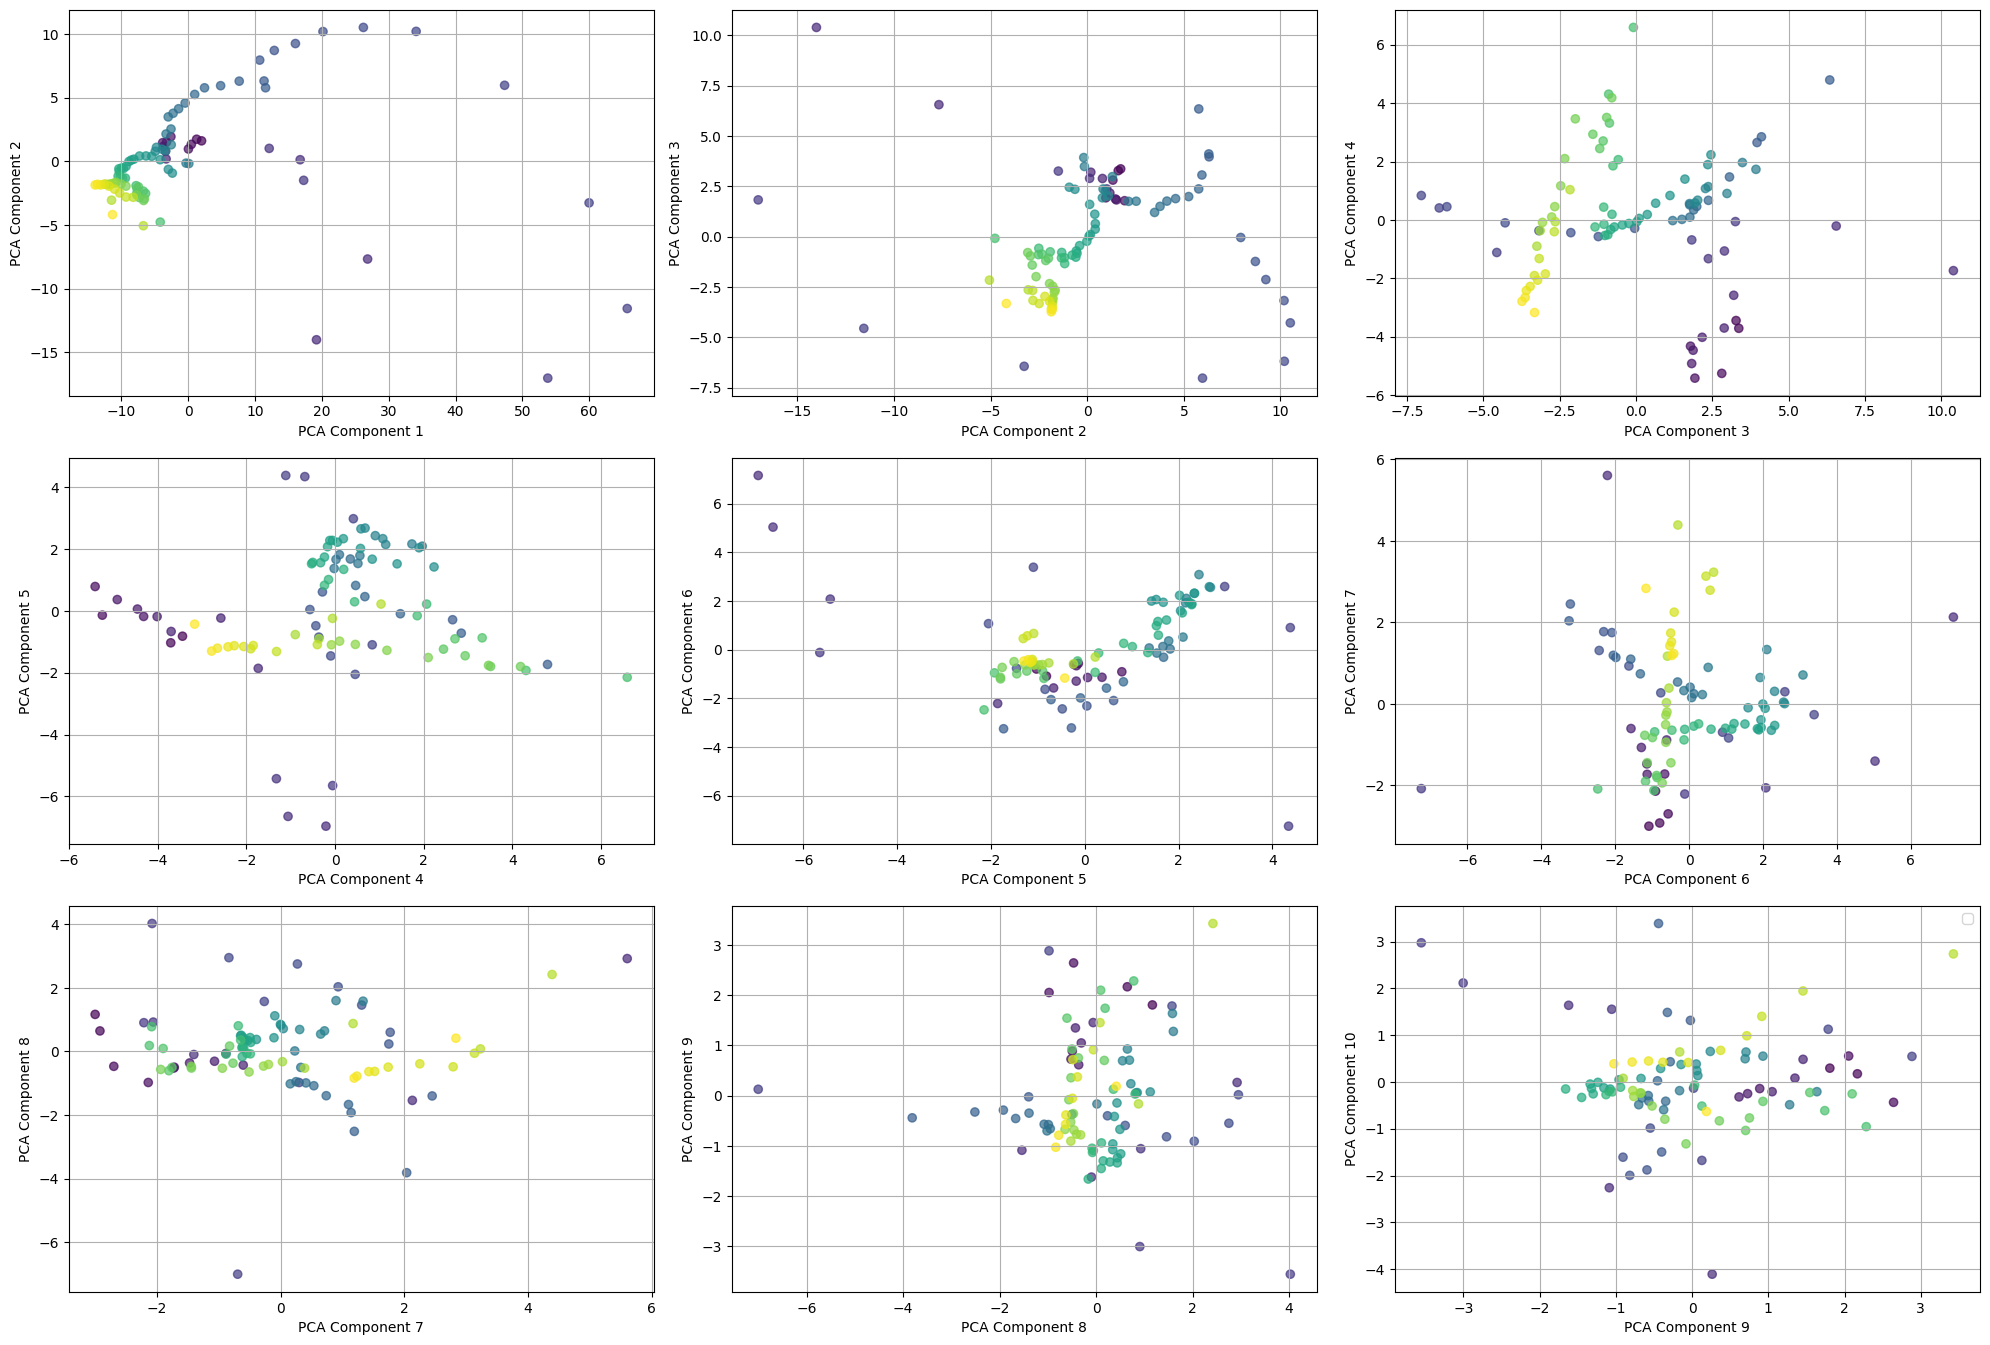

In [82]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [83]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.376
KMeans Davies-Bouldin Index is 0.882


<Axes: xlabel='k'>

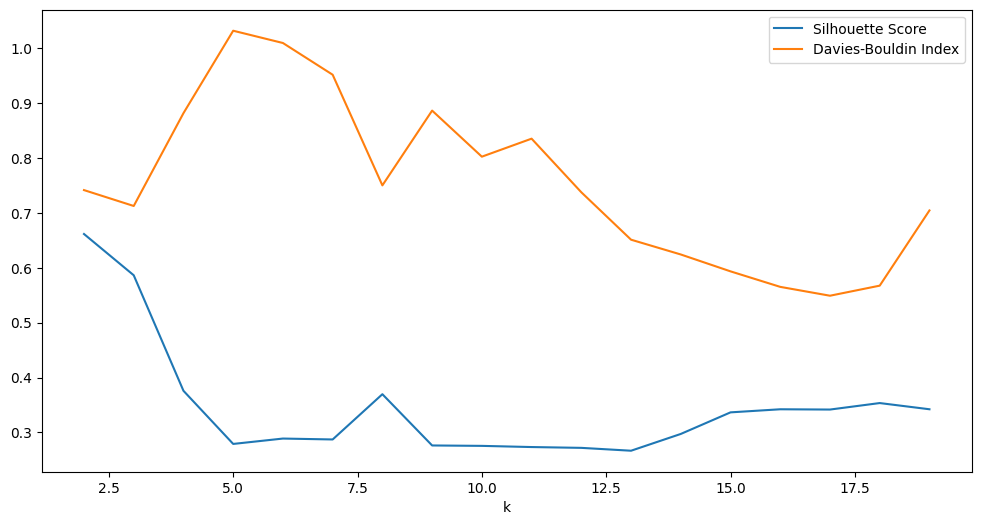

In [84]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         2     85         -0.276292   
2    1.01            3         4     77         -0.203453   
3    1.27            3         5     70         -0.217470   
4    1.52            3         4     66         -0.169673   
5    1.78            3         5     57         -0.089116   
6    2.03            3         7     47          0.009492   
7    2.29            3         8     39          0.058484   
8    2.54            3         6     36          0.083091   
9    2.80            3         6     33          0.104941   
10   3.05            3         5     31          0.105233   
11   3.31            3         5     31          0.105233   
12   3.56            3         3     27         -0.012924   
13   3.82            3         3     23          0.041506   
14   4.07            3         3     23          0.041506   
15   4.33            3         4     19          0.073248   
16   4.58            3         4     17          0.079490   
17   4.84            3         3     16          0.161324   
18   5.09            3         3     15          0.150027   
19   5.35            3         3     12          0.159233   
20   5.60            3         3     11          0.171313   
21   5.86            3         3     11          0.171313   
22   6.11            3         3     11          0.171313   
23   6.37            3         2     11          0.475898   
24   6.62            3         2     10          0.514409   
25   6.88            3         2     10          0.514409   
26   7.13            3         1     10               NaN   
27   7.39            3         2      7          0.434581   
28   7.64            3         2      7          0.434581   
29   7.90            3         2      7          0.434581   
30   8.15            3         2      7          0.434581   
31   8.41            3         2      7          0.434581   
32   8.66            3         2      7          0.434581   
33   8.92            3         2      6          0.418729   
34   9.17            3         2      6          0.418729   
35   9.43            3         2      6          0.418729   
36   9.68            3         2      6          0.418729   
37   9.94            3         2      6          0.418729   
38  10.19            3         2      6          0.418729   
39  10.45            3         2      6          0.418729   
40  10.70            3         2      6          0.418729   
41  10.96            3         2      6          0.418729   
42  11.21            3         2      6          0.418729   
43  11.47            3         2      6          0.418729   
44  11.72            3         2      6          0.418729   
45  11.98            3         1      6               NaN   
46  12.23            3         1      6               NaN   
47  12.49            3         1      6               NaN   
48  12.74            3         1      6               NaN   
49  13.00            3         1      6               NaN   

    Davies-Bouldin Index  
0                    NaN  
1               1.180838  
2               1.118583  
3               1.455823  
4               1.497075  
5               1.435329  
6               1.337674  
7               1.181338  
8               1.172874  
9               1.183239  
10              1.236691  
11              1.236691  
12              1.207088  
13              1.610636  
14              1.610636  
15              1.430246  
16              1.348247  
17              1.510230  
18              1.507374  
19              1.304368  
20              1.200537  
21              1.200537  
22              1.200537  
23              0.961143  
24              1.038105  
25              1.038105  
26                   NaN  
27              0.757475  
28              0.757475  
29              0.757475  
30              0.757475  
31              0.757475  
32 

<Axes: xlabel='eps'>

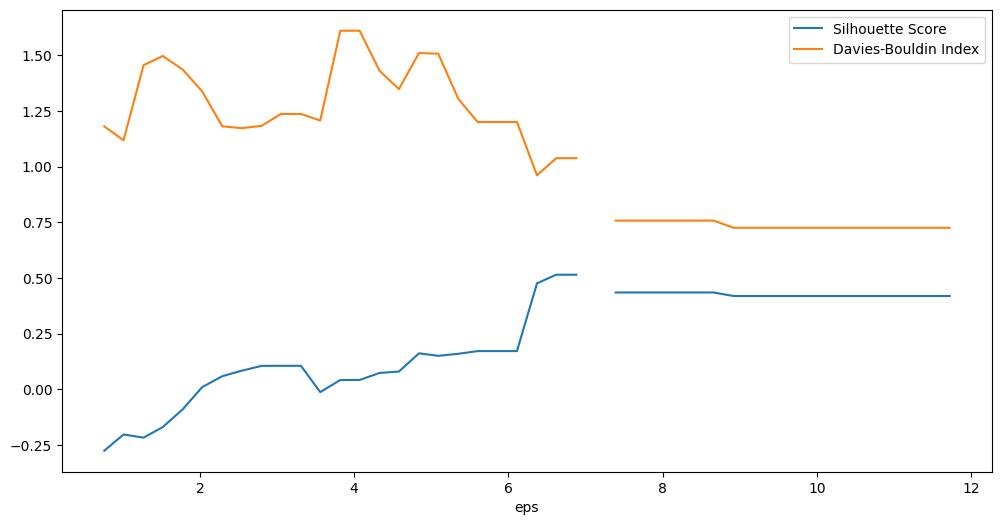

In [85]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

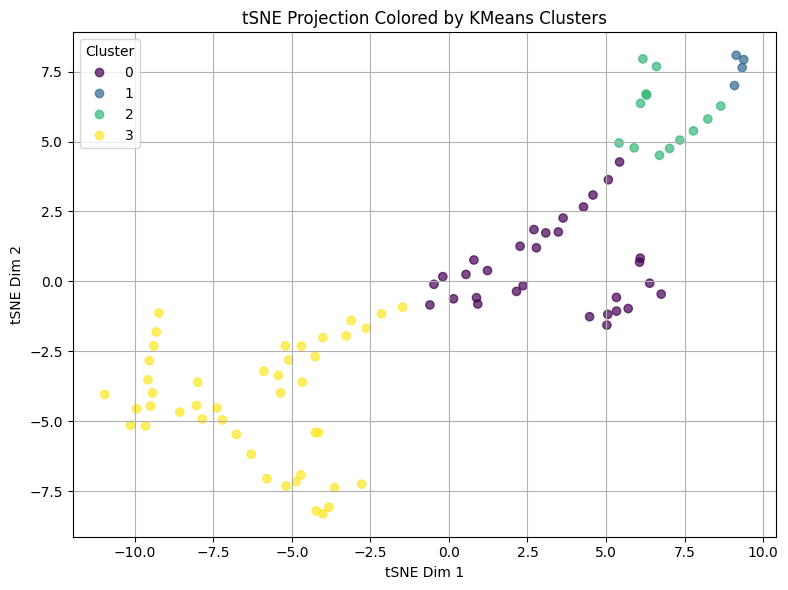

In [86]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        27    234          0.604314   
1    0.05            2        29    224          0.575114   
2    0.06            2        31    205          0.537935   
3    0.06            2        35    184          0.473368   
4    0.07            2        33    175          0.421333   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      3          0.757753   
196  0.99            2         2      3          0.757753   
197  0.99            2         2      3          0.757753   
198  1.00            2         2      3          0.757753   
199  1.00            2         2      3          0.757753   

     Davies-Bouldin Index  
0                0.461897  
1                0.485397  
2                0.523982  
3                0.563900  
4                0.636918  
..                    ...  
195              0.269257  
196              0.269257  
197              0.269257  
198              0.269257  
199              0.269257  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

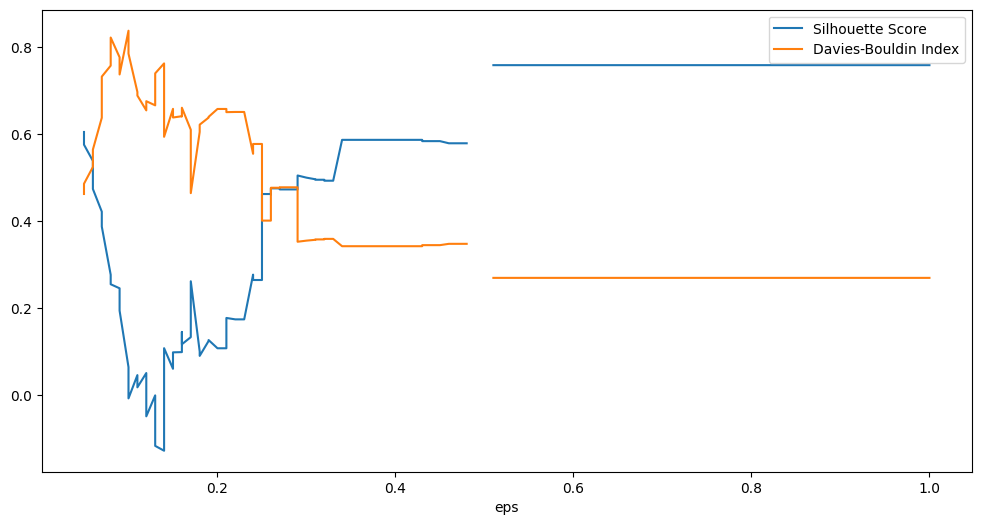

In [87]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [88]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [89]:
#Start with spring and work our way down to winter
season = 2
season_year = 2005
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2005-06-01 to 2005-08-31
Columns: 294 entries, 10000009 to 25000592
dtypes: float64(294)
memory usage: 212.0 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2005-06-01  0.742071  0.989822  0.602330  0.882211  0.651797  0.554821   
2005-06-02  0.687176  0.832919  0.512614  0.758707  0.653626  0.547634   
2005-06-03  0.736971  0.773152  0.461149  0.768392  0.685564  0.549306   
2005-06-04  0.793453  0.956986  0.813794  0.863762  0.747316  0.568424   
2005-06-05  0.919255  1.117030  0.874807  1.013816  0.957678  0.575967   
...              ...       ...       ...       ...       ...       ...   
2005-08-27  0.645324  0.429973  0.338847  0.650459  0.411767  0.348950   
2005-08-28  0.647070  0.436585  0.328468  0.674278  0.387356  0.348831   
2005-08-29  0.643775  0.419856  0.306139  0.693783  0.329578  0.351135   
2005-08-30  0.639379  0.403611  0.283718  0.712511  0.331470  0.356588   
2005-08-31  0.636390  0.416041  0.274755  0.728669  0.345536  0.355504   

            11000016  13000011  13000019  13000065  ...  66000014  67000017  \
2005-06-01  0.609142  0.392983  

          2005-06-01  2005-06-02  2005-06-03  2005-06-04  2005-06-05  \
10000009    0.425395    0.279310    0.271183   -0.224619    0.120090   
10000010    0.958309    0.586052    0.344541   -0.002892    0.455782   
10000011    0.124813   -0.088087   -0.288058   -0.197039    0.044645   
10000014    0.726838    0.429859    0.334891   -0.129290    0.280592   
10000016    0.231215    0.208697    0.166953   -0.287174    0.185307   
...              ...         ...         ...         ...         ...   
8000001    -0.118919   -0.123756   -0.152350   -0.294756    0.237242   
9000001     0.545332    0.591075    0.500019   -0.045982    0.323200   
9000015     0.576186    0.614501    0.520061   -0.041342    0.312459   
22000047   -0.207026   -0.119173   -0.262500   -0.608004   -0.614274   
25000592    1.417398    1.560210    1.262559    1.120009    1.246834   

          2005-06-06  2005-06-07  2005-06-08  2005-06-09  2005-06-10  ...  \
10000009    0.074474   -0.015415   -0.023379   -0.019908  

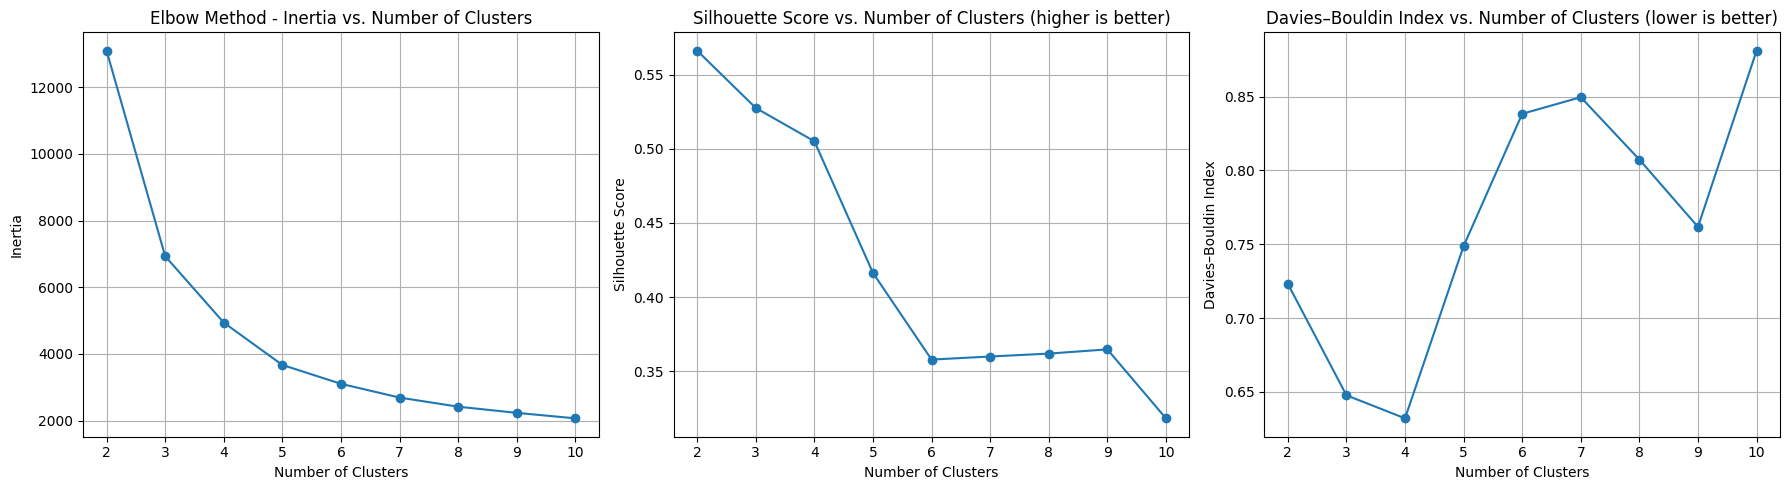

In [90]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        1
10000010        1
10000011        0
10000014        1
10000016        1

            10000009  10000010  10000011  10000014  10000016  11000011  \
2005-06-01  0.742071  0.989822  0.602330  0.882211  0.651797  0.554821   
2005-06-02  0.687176  0.832919  0.512614  0.758707  0.653626  0.547634   
2005-06-03  0.736971  0.773152  0.461149  0.768392  0.685564  0.549306   
2005-06-04  0.793453  0.956986  0.813794  0.863762  0.747316  0.568424   
2005-06-05  0.919255  1.117030  0.874807  1.013816  0.957678  0.575967   
...              ...       ...       ...       ...       ...       ...   
2005-08-27  0.645324  0.429973  0.338847  0.650459  0.411767  0.348950   
2005-08-28  0.647070  0.436585  0.328468  0.674278  0.387356  0.348831   
2005-08-29  0.643775  0.419856  0.306139  0.693783  0.329578  0.351135   
2005-08-30  0.639379  0.403611  0.283718  0.712511  0.331470  0.356588   
2005-08-31  0.636390  0.416041  0.274755  0.728669  0.345536  0.355504   

            11000016  13000011  13000019  13000065  ...  66000014  67000017  \
2005-06-01  0.609142  0.392983  

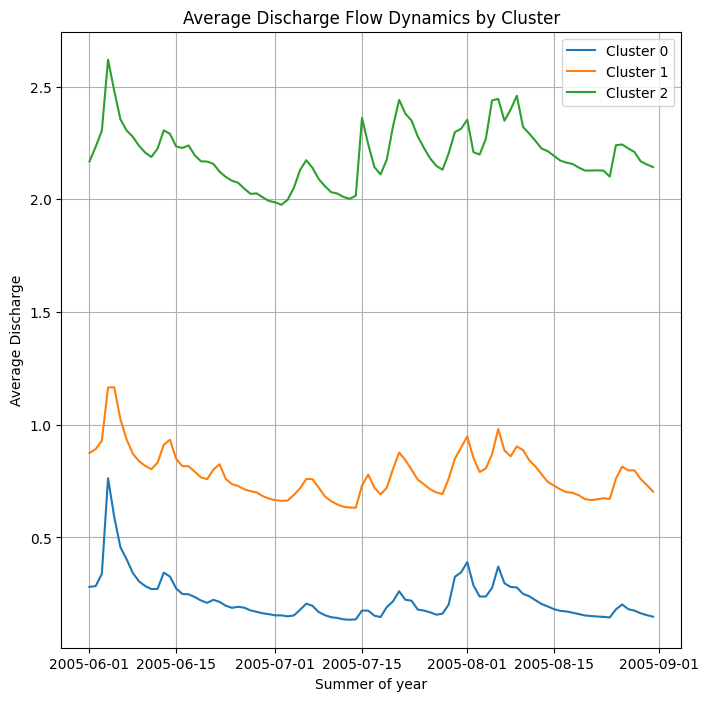

In [91]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [92]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [93]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2005-06-01  0.742071  0.989822  0.602330  0.882211  0.651797  0.554821   
2005-06-02  0.687176  0.832919  0.512614  0.758707  0.653626  0.547634   
2005-06-03  0.736971  0.773152  0.461149  0.768392  0.685564  0.549306   
2005-06-04  0.793453  0.956986  0.813794  0.863762  0.747316  0.568424   
2005-06-05  0.919255  1.117030  0.874807  1.013816  0.957678  0.575967   
...              ...       ...       ...       ...       ...       ...   
2005-08-27  0.645324  0.429973  0.338847  0.650459  0.411767  0.348950   
2005-08-28  0.647070  0.436585  0.328468  0.674278  0.387356  0.348831   
2005-08-29  0.643775  0.419856  0.306139  0.693783  0.329578  0.351135   
2005-08-30  0.639379  0.403611  0.283718  0.712511  0.331470  0.356588   
2005-08-31  0.636390  0.416041  0.274755  0.728669  0.345536  0.355504   

            11000016  13000011  13000019  13000065  ...  66000014  67000017  \
2005-06-01  0.609142  0.392983  0.637668  0.901191  ...  0.145965  0.101627   
2005-06-02  0.636082  0.457901  0.656052  0.917347  ...  0.145041  0.100654   
2005-06-03  0.672548  0.460924  0.674569  0.926947  ...  0.154206  0.102647   
2005-06-04  0.744189  0.528412  0.744232  1.064064  ...  0.157288  0.102965   
2005-06-05  0.879130  0.525540  0.802942  1.262749  ...  0.141211  0.098117   
...              ...       ...       ...       ...  ...       ...       ...   
2005-08-27  0.464071  0.479213  0.546805  0.746882  ...  0.074622  0.015555   
2005-08-28  0.445890  0.452611  0.546270  0.734172  ...  0.068070  0.013668   
2005-08-29  0.464811  0.418452  0.539270  0.719380  ...  0.062365  0.013166   
2005-08-30  0.460367  0.392152  0.526913  0.731990  ...  0.052187  0.011587   
2005-08-31  0.445718  0.371898  0.512839  0.740481  ...  0.051777  0.011443   

            67000018  67000019   7000003   8000001   9000001   9000015  \
2005-06-01  0.107682  0.165271  0.456581  0.489020  0.797829  0.812173   
2005-06-02  0.106913  0.158987  0.454109  0.495666  0.835306  0.846437   
2005-06-03  0.110114  0.159076  0.484549  0.528081  0.849835  0.859719   
2005-06-04  0.114308  0.161701  0.589216  0.741724  0.925205  0.928627   
2005-06-05  0.100826  0.144442  0.866331  0.988276  1.038919  1.032590   
...              ...       ...       ...       ...       ...       ...   
2005-08-27  0.084824  0.055258  0.131200  0.371522  0.649066  0.676166   
2005-08-28  0.061237  0.042555  0.129840  0.368252  0.637438  0.665535   
2005-08-29  0.052127  0.034318  0.124756  0.367443  0.635531  0.663792   
2005-08-30  0.044977  0.024047  0.111974  0.349534  0.622028  0.651446   
2005-08-31  0.036280  0.018270  0.097534  0.342455  0.583445  0.616172   

            22000047  25000592  
2005-06-01  0.448059  1.203251  
2005-06-02  0.497844  1.295774  
2005-06-03  0.473754  1.225925  
2005-06-04  0.510691  1.785170  
2005-06-05  0.486602  1.583081  
...              ...       ...  
2005-08-27  0.631137  1.201882  
2005-08-28  0.534780  1.113772  
2005-08-29  0.518721  1.044837  
2005-08-30  0.489814  1.001923  
2005-08-31  0.468936  0.971184  

[92 rows x 294 columns]

<Axes: >

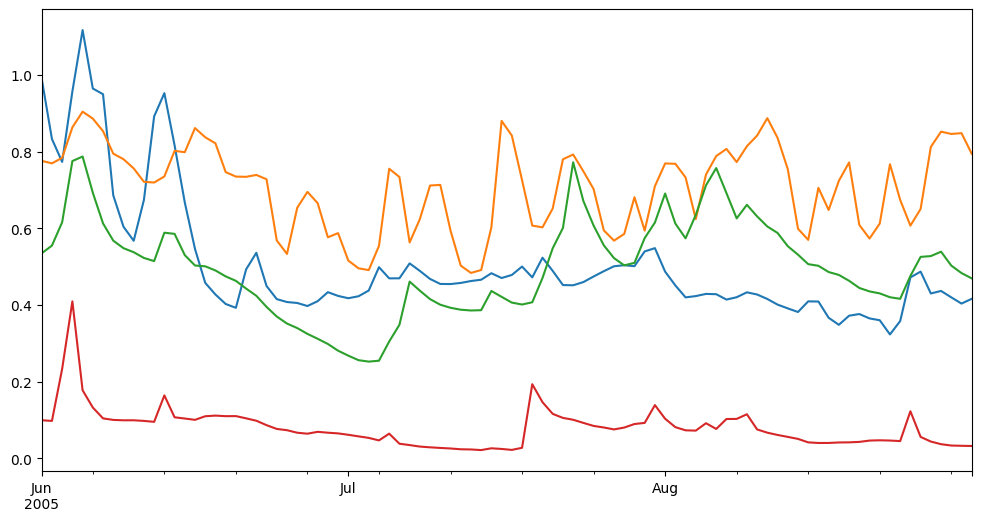

In [94]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

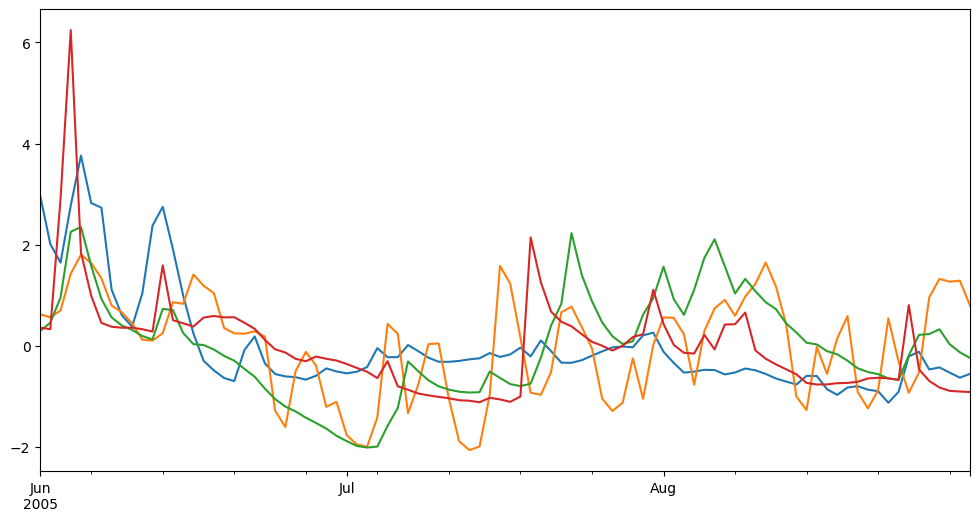

In [95]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

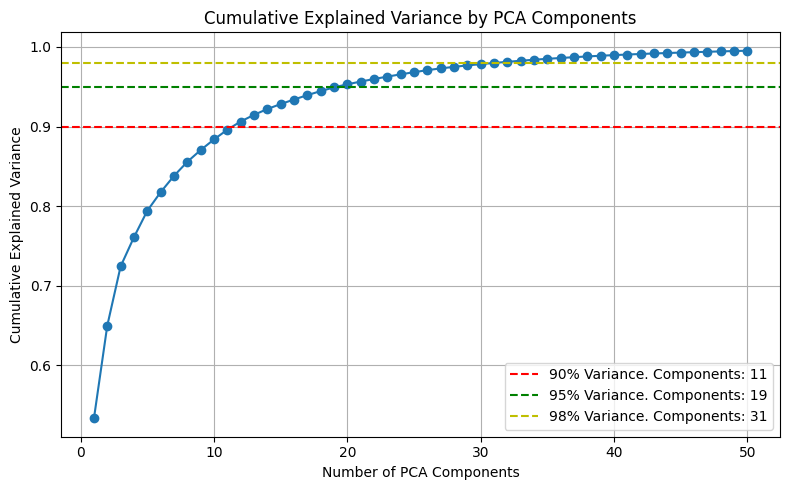

In [96]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [97]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 1.21469822e+01, -5.77310716e+00,  1.71184751e+00, ...,
        -4.01768680e-01,  5.35820523e-03, -9.13265153e-01],
       [ 1.31263781e+01, -5.51307972e+00, -2.55907390e-01, ...,
         8.14509313e-01, -4.65207733e-01, -1.94978021e-01],
       [ 1.85138851e+01, -4.76590926e+00,  2.62487302e-01, ...,
        -6.83488799e-01, -5.07289147e-01,  6.95261153e-01],
       ...,
       [-7.36128446e+00,  1.75176335e+00,  4.85399874e+00, ...,
        -5.81524021e-01, -4.69104805e-01,  4.21025985e-01],
       [-8.97918858e+00,  1.17360129e+00,  4.47109396e+00, ...,
        -6.37129766e-01, -1.61930596e-01,  9.19279488e-01],
       [-1.06119468e+01,  1.03122015e+00,  3.78578215e+00, ...,
        -6.69838090e-01,  1.56318919e-01,  6.35348496e-01]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_52112\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


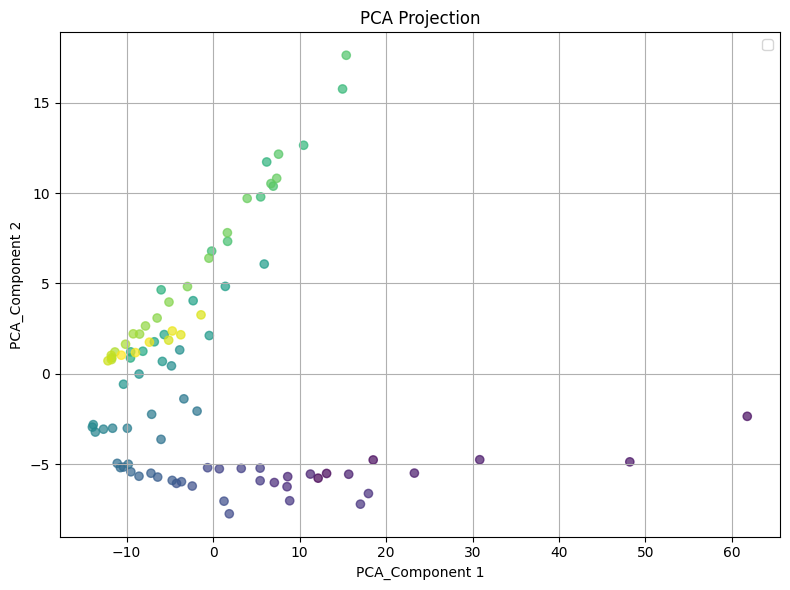

In [98]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_52112\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


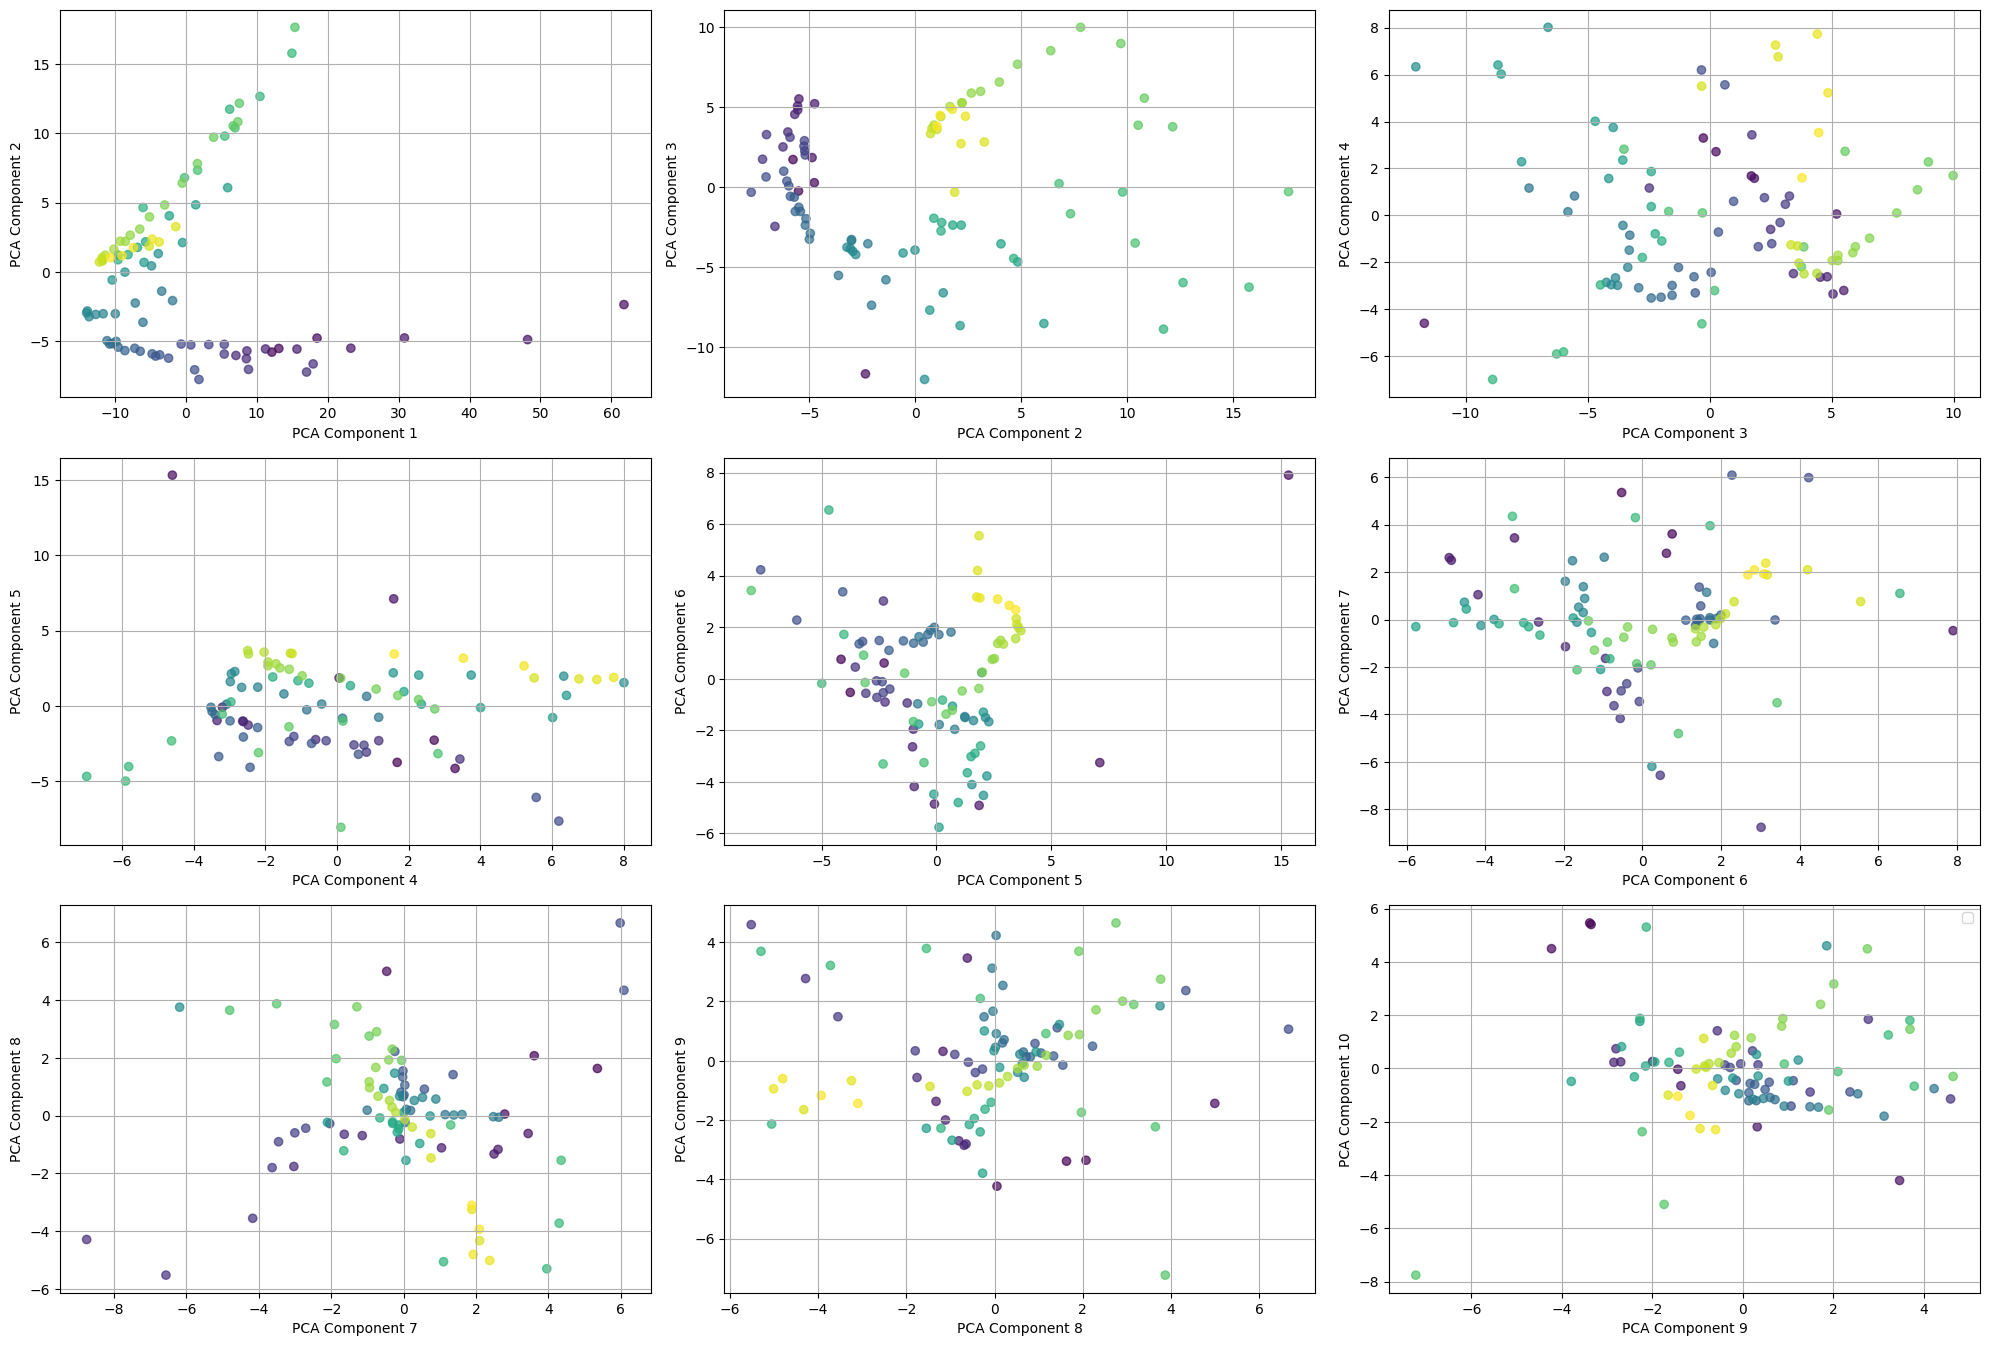

In [99]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [100]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.215
KMeans Davies-Bouldin Index is 1.465


<Axes: xlabel='k'>

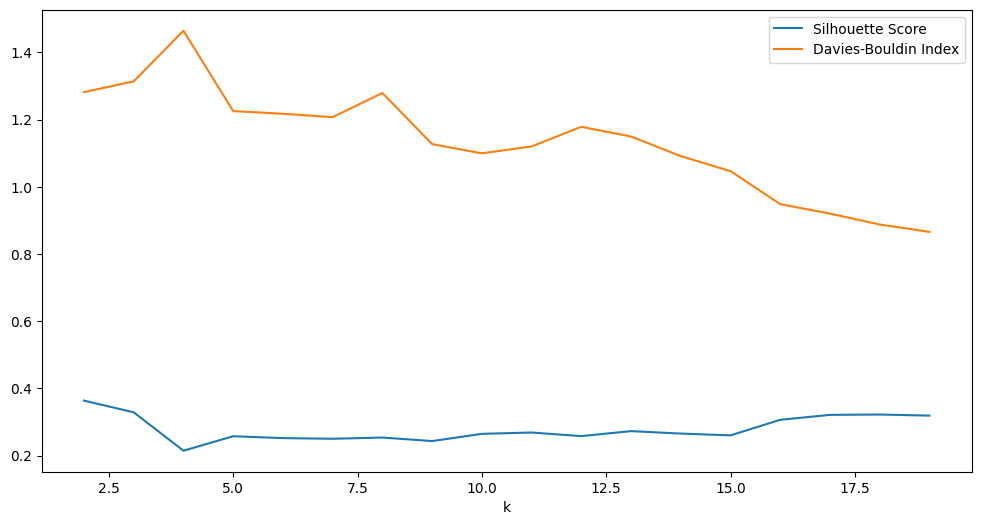

In [101]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         1     89               NaN   
3    1.27            3         2     86         -0.135626   
4    1.52            3         4     78         -0.104007   
5    1.78            3         4     75         -0.071083   
6    2.03            3         4     71         -0.026760   
7    2.29            3         4     66          0.006821   
8    2.54            3         4     64          0.025265   
9    2.80            3         5     60         -0.035203   
10   3.05            3         6     55          0.004433   
11   3.31            3         7     51          0.031473   
12   3.56            3         7     49          0.035352   
13   3.82            3         7     49          0.035352   
14   4.07            3         7     49          0.035352   
15   4.33            3         7     44          0.072768   
16   4.58            3         7     43          0.079012   
17   4.84            3         7     40          0.093343   
18   5.09            3         6     39          0.062761   
19   5.35            3         6     39          0.062761   
20   5.60            3         4     37          0.084448   
21   5.86            3         4     36          0.109199   
22   6.11            3         3     33          0.040768   
23   6.37            3         3     30          0.083856   
24   6.62            3         3     30          0.083856   
25   6.88            3         2     29          0.121520   
26   7.13            3         2     29          0.121520   
27   7.39            3         2     29          0.121520   
28   7.64            3         3     26          0.091012   
29   7.90            3         3     26          0.091012   
30   8.15            3         3     26          0.091012   
31   8.41            3         4     22          0.065923   
32   8.66            3         5     17          0.083936   
33   8.92            3         3     14          0.070763   
34   9.17            3         3     13          0.068143   
35   9.43            3         3     13          0.068143   
36   9.68            3         3     13          0.068143   
37   9.94            3         3     11          0.070515   
38  10.19            3         3     10          0.056613   
39  10.45            3         3      7          0.081163   
40  10.70            3         3      7          0.081163   
41  10.96            3         3      7          0.081163   
42  11.21            3         3      7          0.081163   
43  11.47            3         3      7          0.081163   
44  11.72            3         3      7          0.081163   
45  11.98            3         3      7          0.081163   
46  12.23            3         2      7          0.234368   
47  12.49            3         2      7          0.234368   
48  12.74            3         1      7               NaN   
49  13.00            3         1      7               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.043703  
4               1.076637  
5               1.091030  
6               1.121850  
7               1.144702  
8               1.162404  
9               1.477263  
10              1.531281  
11              1.441735  
12              1.449067  
13              1.449067  
14              1.449067  
15              1.470555  
16              1.458896  
17              1.454290  
18              1.520169  
19              1.520169  
20              1.666729  
21              1.693742  
22              1.680378  
23              1.658732  
24              1.658732  
25              1.725671  
26              1.725671  
27              1.725671  
28              1.702816  
29              1.702816  
30              1.702816  
31              1.834671  
32 

<Axes: xlabel='eps'>

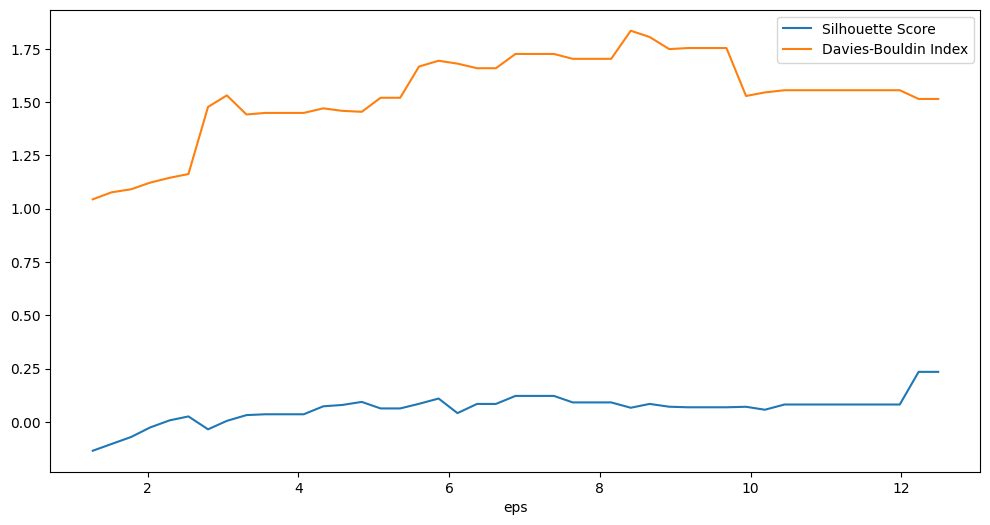

In [102]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

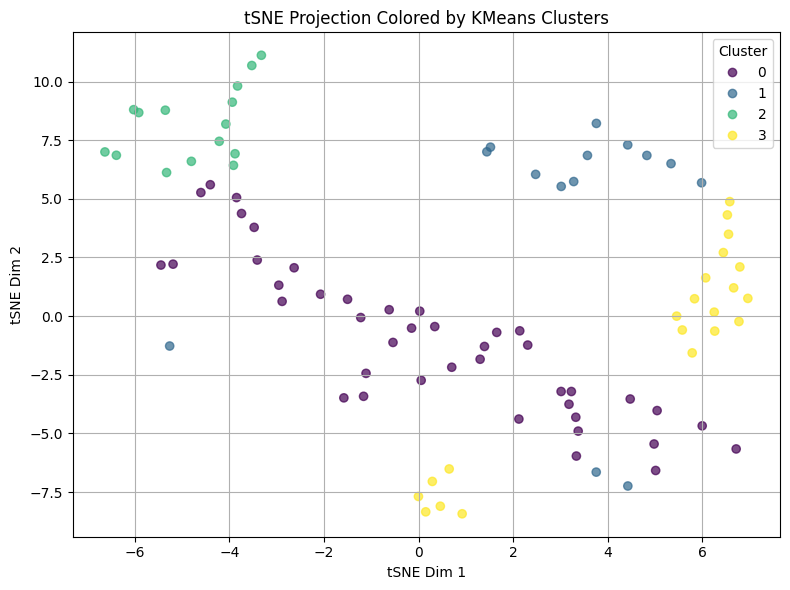

In [103]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2         5    284          0.998750   
1    0.05            2         7    280          0.994800   
2    0.06            2         8    278          0.993338   
3    0.06            2         8    278          0.993338   
4    0.07            2         8    278          0.993338   
..    ...          ...       ...    ...               ...   
195  0.98            2        27     89          0.174767   
196  0.99            2        26     89          0.167410   
197  0.99            2        25     89          0.193251   
198  1.00            2        24     89          0.189251   
199  1.00            2        24     89          0.189251   

     Davies-Bouldin Index  
0                0.001337  
1                0.006029  
2                0.008387  
3                0.008387  
4                0.008387  
..                    ...  
195              0.737120  
196              0.761866  
197              0.762379  
198              0.778162  
199              0.778162  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

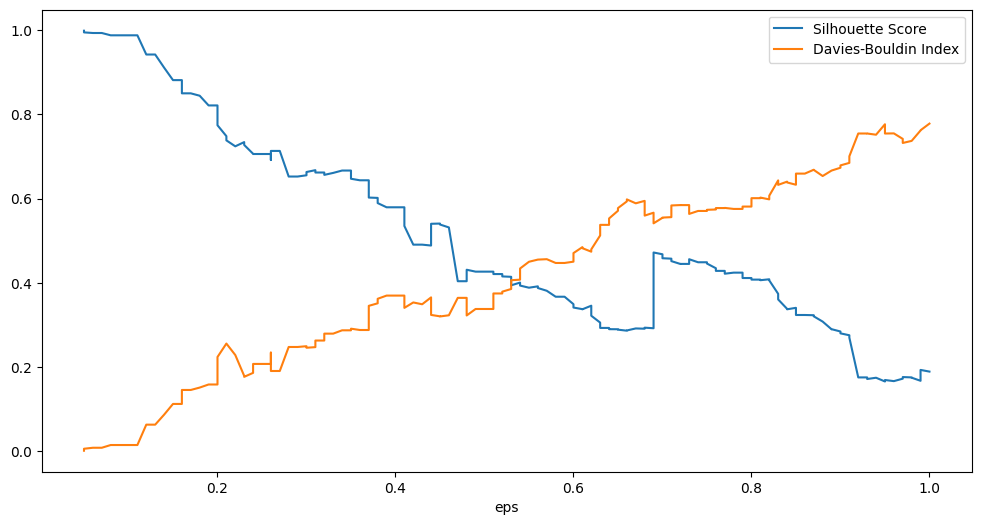

In [104]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [105]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [106]:
#Start with spring and work our way down to winter
season = 3
season_year = 2005
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2005-09-01 to 2005-11-30
Columns: 292 entries, 10000009 to 25000592
dtypes: float64(292)
memory usage: 208.3 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2005-09-01  0.621560  0.420728  0.271860  0.711456  0.349132  0.346955   
2005-09-02  0.620451  0.473849  0.435709  0.703160  0.356659  0.338637   
2005-09-03  0.610763  0.471527  0.411871  0.687122  0.343959  0.337934   
2005-09-04  0.599904  0.405752  0.340449  0.670231  0.349552  0.333924   
2005-09-05  0.595271  0.404353  0.318890  0.659169  0.350162  0.329387   
...              ...       ...       ...       ...       ...       ...   
2005-11-26  1.103600  0.790683  0.560875  0.839199  0.453104  1.216413   
2005-11-27  1.271980  0.844719  0.523578  0.788237  0.411094  1.266059   
2005-11-28  0.910635  0.787282  0.449446  0.698126  0.368644  1.286985   
2005-11-29  0.755213  0.752392  0.384029  0.649099  0.351423  1.286847   
2005-11-30  0.703021  0.754861  0.355356  0.633076  0.361936  1.286891   

            11000016  13000011  13000019  13000065  ...  66000014  67000017  \
2005-09-01  0.445286  0.357161  

          2005-09-01  2005-09-02  2005-09-03  2005-09-04  2005-09-05  \
10000009   -0.038904   -0.040370   -0.040656   -0.040552   -0.040421   
10000010   -0.056574   -0.053165   -0.052826   -0.057490   -0.057225   
10000011   -0.069671   -0.056493   -0.058039   -0.063187   -0.064747   
10000014   -0.030995   -0.033151   -0.033983   -0.034417   -0.034797   
10000016   -0.062873   -0.063393   -0.063975   -0.062393   -0.061995   
...              ...         ...         ...         ...         ...   
8000001    -0.063440   -0.055073   -0.049392   -0.051901   -0.053072   
9000001    -0.047013   -0.047403   -0.047496   -0.047191   -0.047686   
9000015    -0.043725   -0.044221   -0.044254   -0.043890   -0.044271   
22000047   -0.053604   -0.053734   -0.053333   -0.052538   -0.051964   
25000592   -0.009710   -0.009162   -0.008890   -0.009198   -0.008124   

          2005-09-06  2005-09-07  2005-09-08  2005-09-09  2005-09-10  ...  \
10000009   -0.042137   -0.044992   -0.045502   -0.043550  

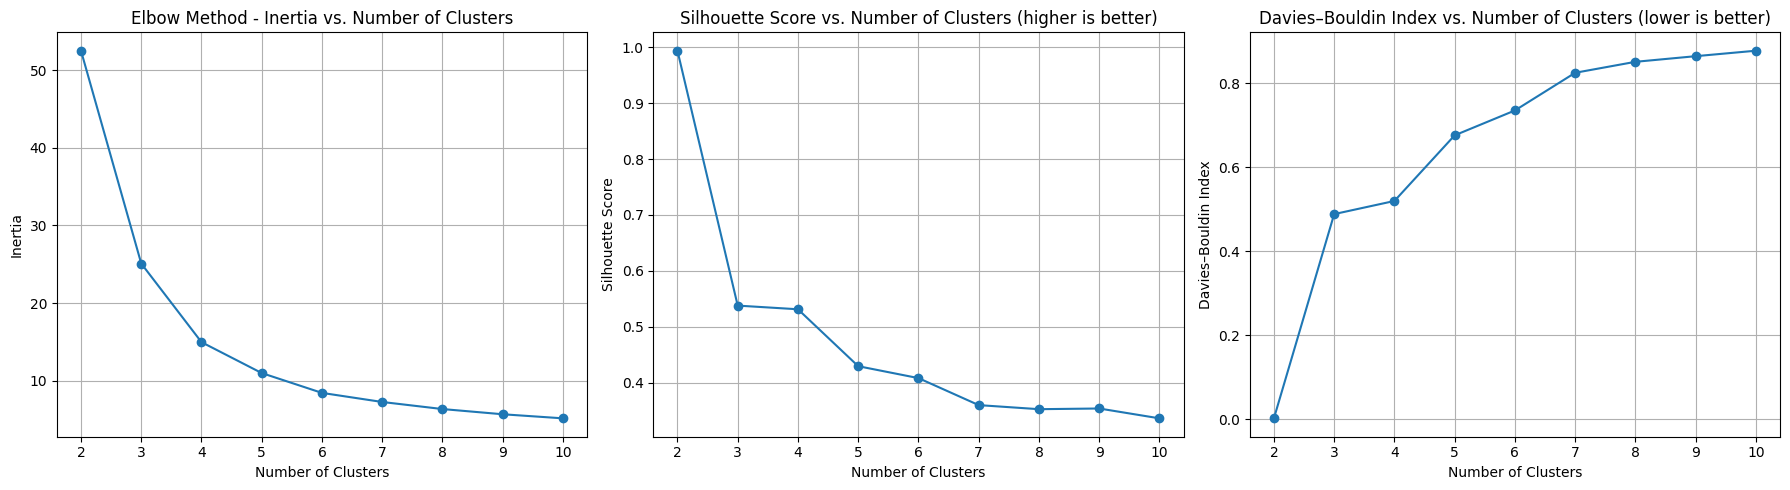

In [107]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        2
10000010        0
10000011        0
10000014        2
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2005-09-01  0.621560  0.420728  0.271860  0.711456  0.349132  0.346955   
2005-09-02  0.620451  0.473849  0.435709  0.703160  0.356659  0.338637   
2005-09-03  0.610763  0.471527  0.411871  0.687122  0.343959  0.337934   
2005-09-04  0.599904  0.405752  0.340449  0.670231  0.349552  0.333924   
2005-09-05  0.595271  0.404353  0.318890  0.659169  0.350162  0.329387   
...              ...       ...       ...       ...       ...       ...   
2005-11-26  1.103600  0.790683  0.560875  0.839199  0.453104  1.216413   
2005-11-27  1.271980  0.844719  0.523578  0.788237  0.411094  1.266059   
2005-11-28  0.910635  0.787282  0.449446  0.698126  0.368644  1.286985   
2005-11-29  0.755213  0.752392  0.384029  0.649099  0.351423  1.286847   
2005-11-30  0.703021  0.754861  0.355356  0.633076  0.361936  1.286891   

            11000016  13000011  13000019  13000065  ...  66000014  67000017  \
2005-09-01  0.445286  0.357161  

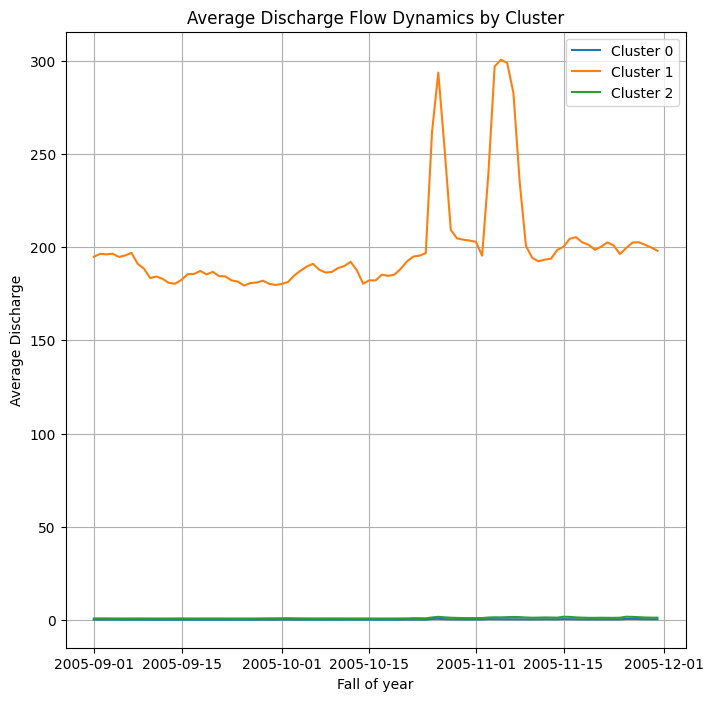

In [108]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [109]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [110]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2005-09-01  0.621560  0.420728  0.271860  0.711456  0.349132  0.346955   
2005-09-02  0.620451  0.473849  0.435709  0.703160  0.356659  0.338637   
2005-09-03  0.610763  0.471527  0.411871  0.687122  0.343959  0.337934   
2005-09-04  0.599904  0.405752  0.340449  0.670231  0.349552  0.333924   
2005-09-05  0.595271  0.404353  0.318890  0.659169  0.350162  0.329387   
...              ...       ...       ...       ...       ...       ...   
2005-11-26  1.103600  0.790683  0.560875  0.839199  0.453104  1.216413   
2005-11-27  1.271980  0.844719  0.523578  0.788237  0.411094  1.266059   
2005-11-28  0.910635  0.787282  0.449446  0.698126  0.368644  1.286985   
2005-11-29  0.755213  0.752392  0.384029  0.649099  0.351423  1.286847   
2005-11-30  0.703021  0.754861  0.355356  0.633076  0.361936  1.286891   

            11000016  13000011  13000019  13000065  ...  66000014  67000017  \
2005-09-01  0.445286  0.357161  0.502540  0.668995  ...  0.040915  0.011380   
2005-09-02  0.445856  0.344994  0.498535  0.623374  ...  0.034334  0.010792   
2005-09-03  0.448011  0.335018  0.499694  0.661386  ...  0.032600  0.010572   
2005-09-04  0.448312  0.323682  0.494864  0.619792  ...  0.034185  0.011215   
2005-09-05  0.450280  0.317334  0.492219  0.599318  ...  0.036940  0.012834   
...              ...       ...       ...       ...  ...       ...       ...   
2005-11-26  2.815349  0.727775  1.301016  1.195589  ...  0.131653  0.088595   
2005-11-27  2.022305  0.683716  1.126261  1.069206  ...  0.122893  0.095850   
2005-11-28  1.472477  0.601567  0.948517  0.941338  ...  0.117443  0.083968   
2005-11-29  1.212257  0.558565  0.869960  0.883763  ...  0.112345  0.085260   
2005-11-30  1.206224  0.546247  0.856042  0.871719  ...  0.109071  0.097263   

            67000018  67000019   7000003   8000001   9000001   9000015  \
2005-09-01  0.038957  0.014901  0.093577  0.342685  0.529400  0.566761   
2005-09-02  0.033238  0.013324  0.105496  0.451987  0.539866  0.576329   
2005-09-03  0.033203  0.010443  0.114106  0.510818  0.532512  0.569606   
2005-09-04  0.029994  0.008297  0.112223  0.469813  0.523801  0.561642   
2005-09-05  0.029821  0.007576  0.115474  0.451532  0.512732  0.551522   
...              ...       ...       ...       ...       ...       ...   
2005-11-26  0.121406  0.228344  1.391830  1.149184  1.782204  1.712141   
2005-11-27  0.111592  0.226908  1.512986  1.230166  1.395845  1.358911   
2005-11-28  0.117187  0.235403  1.169474  0.991860  1.212439  1.191232   
2005-11-29  0.193657  0.252948  0.980562  0.860424  1.210863  1.189791   
2005-11-30  0.404051  0.339340  0.922808  0.819172  1.409818  1.371686   

            22000047  25000592  
2005-09-01  0.454483  0.953379  
2005-09-02  0.467331  0.978032  
2005-09-03  0.465725  0.974227  
2005-09-04  0.462513  0.959314  
2005-09-05  0.464119  0.962205  
...              ...       ...  
2005-11-26  0.501055  1.564820  
2005-11-27  0.459301  1.407623  
2005-11-28  0.456089  1.260622  
2005-11-29  0.456089  1.216947  
2005-11-30  0.448059  1.123816  

[91 rows x 292 columns]

<Axes: >

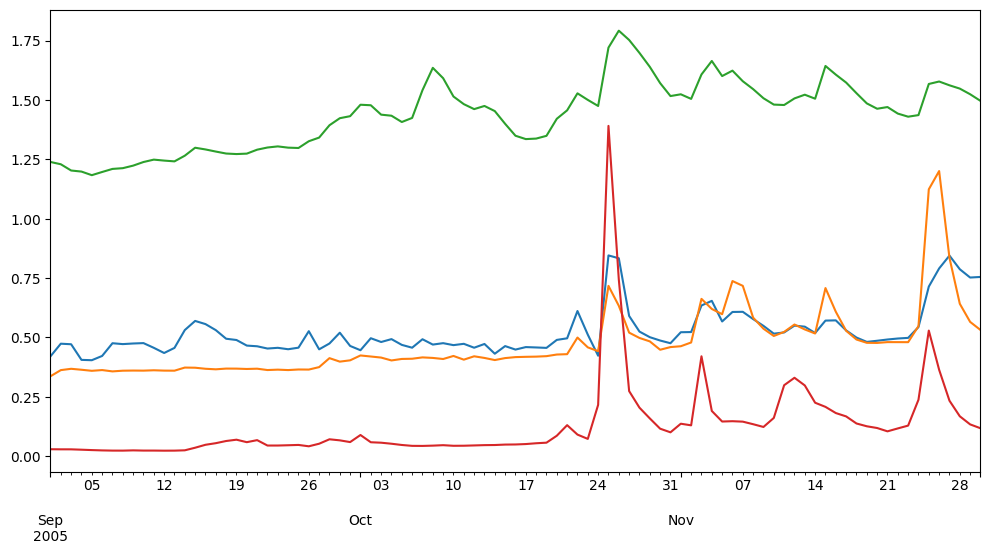

In [111]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

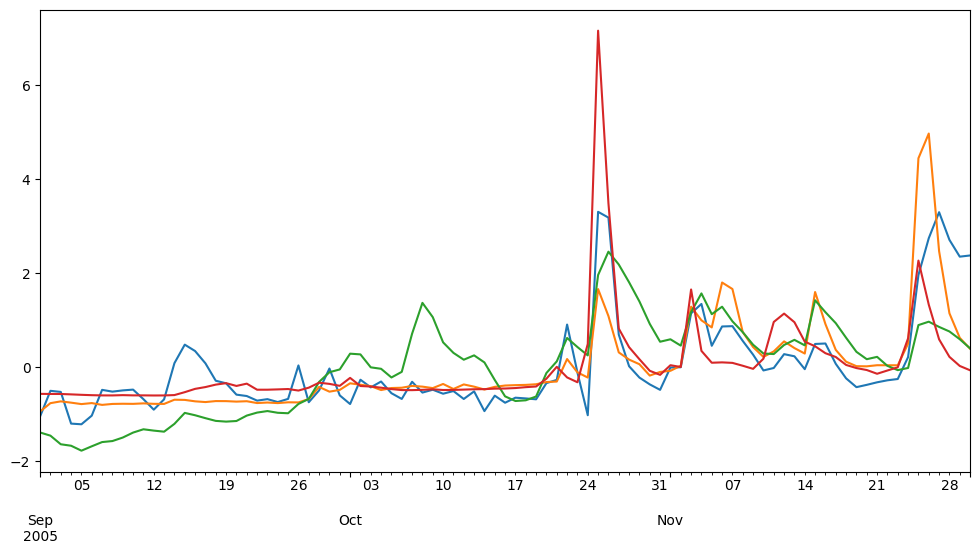

In [112]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

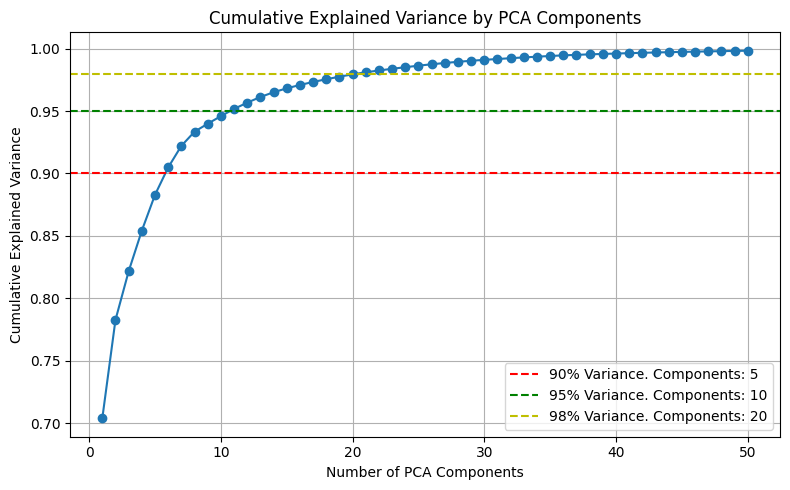

In [113]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [114]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-11.18544241,  -0.66054592,  -1.53163826, ...,  -0.31355366,
          0.03447137,  -1.31945358],
       [ -9.81962455,   0.20629557,  -2.41151998, ...,  -0.06278648,
         -0.59383854,  -0.94526879],
       [-10.59249116,  -0.5122495 ,  -1.975331  , ...,  -0.36851052,
         -1.1999803 ,  -1.07291265],
       ...,
       [ 19.24301819,  -6.61732506,  -0.98368849, ...,  -0.12949496,
          0.09645804,   0.12525917],
       [ 14.69180891,  -6.94333668,  -0.34768037, ...,   0.42038193,
         -0.11656107,   0.15311281],
       [ 13.54092111,  -7.03056462,  -0.20947969, ...,   0.16139266,
         -0.94014437,  -0.62248428]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_52112\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


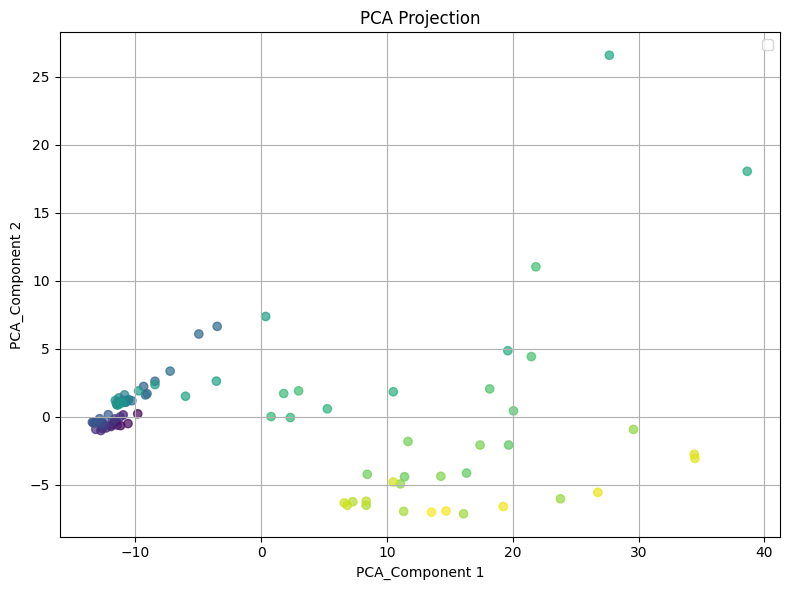

In [115]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_52112\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


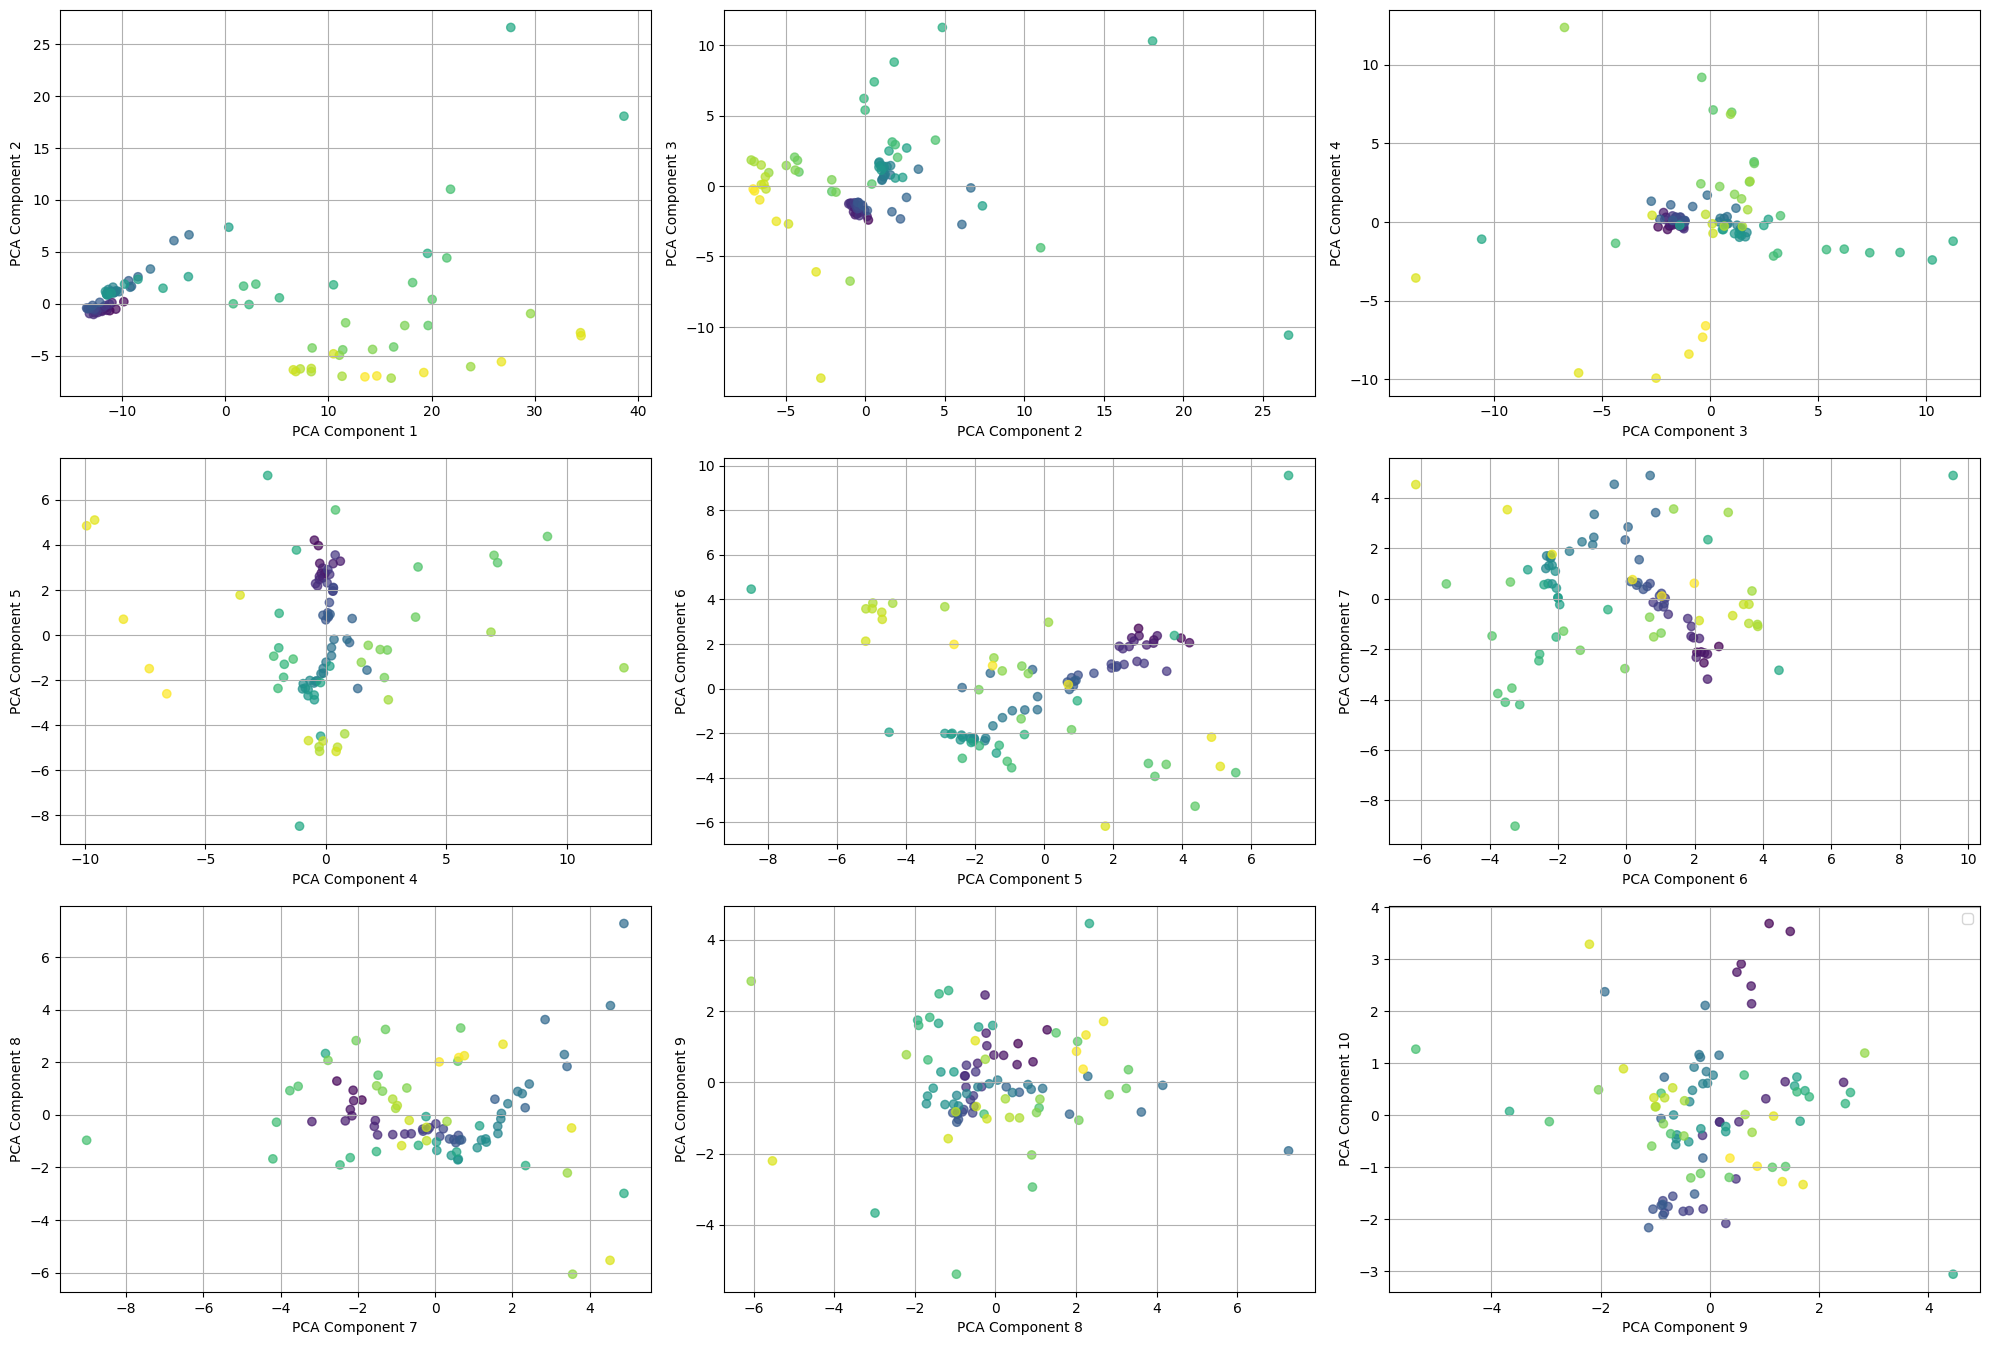

In [116]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [117]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.325
KMeans Davies-Bouldin Index is 1.268


<Axes: xlabel='k'>

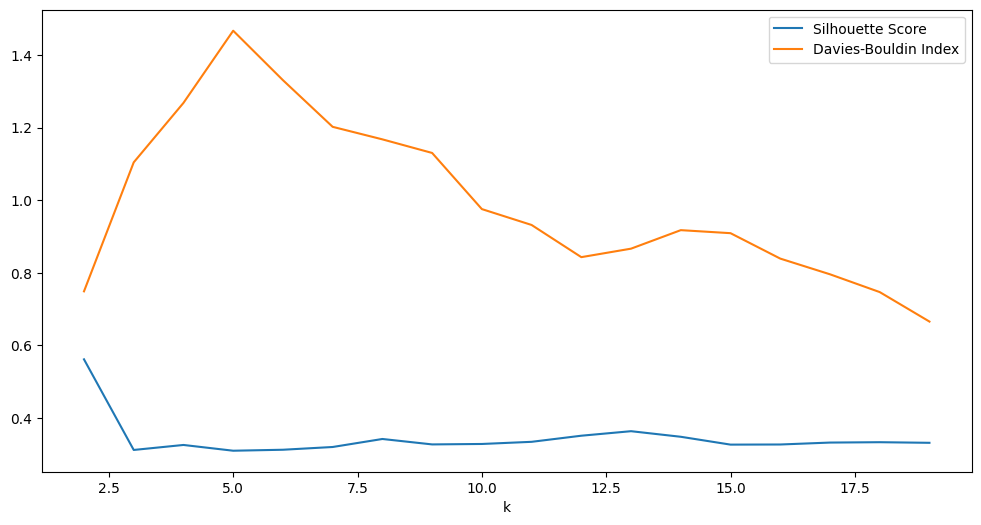

In [118]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     91               NaN   
1    0.76            3         1     88               NaN   
2    1.01            3         2     84         -0.201338   
3    1.27            3         6     69         -0.072409   
4    1.52            3         5     60          0.059875   
5    1.78            3         4     58          0.111030   
6    2.03            3         4     55          0.143539   
7    2.29            3         4     47          0.065489   
8    2.54            3         4     44          0.097297   
9    2.80            3         4     41          0.136199   
10   3.05            3         3     41          0.147531   
11   3.31            3         3     41          0.147531   
12   3.56            3         3     41          0.147531   
13   3.82            3         4     37          0.170566   
14   4.07            3         5     34          0.175313   
15   4.33            3         4     32          0.216100   
16   4.58            3         5     29          0.195578   
17   4.84            3         5     28          0.203947   
18   5.09            3         4     27          0.324647   
19   5.35            3         4     27          0.324647   
20   5.60            3         4     25          0.337686   
21   5.86            3         5     19          0.386479   
22   6.11            3         5     18          0.386990   
23   6.37            3         5     17          0.395297   
24   6.62            3         5     16          0.416912   
25   6.88            3         6     12          0.434394   
26   7.13            3         6     11          0.440226   
27   7.39            3         5     10          0.442357   
28   7.64            3         4     10          0.416758   
29   7.90            3         4     10          0.416758   
30   8.15            3         4     10          0.416758   
31   8.41            3         4     10          0.416758   
32   8.66            3         4      9          0.419009   
33   8.92            3         4      9          0.419009   
34   9.17            3         4      9          0.419009   
35   9.43            3         4      9          0.419009   
36   9.68            3         3      9          0.441854   
37   9.94            3         3      9          0.441854   
38  10.19            3         3      9          0.441854   
39  10.45            3         3      8          0.458731   
40  10.70            3         3      8          0.458731   
41  10.96            3         3      7          0.465089   
42  11.21            3         3      6          0.479655   
43  11.47            3         2      6          0.516971   
44  11.72            3         1      5               NaN   
45  11.98            3         1      5               NaN   
46  12.23            3         1      5               NaN   
47  12.49            3         1      5               NaN   
48  12.74            3         1      5               NaN   
49  13.00            3         1      5               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2               1.110871  
3               1.031009  
4               0.942548  
5               0.923233  
6               0.881618  
7               1.213684  
8               1.155535  
9               1.139503  
10              1.267288  
11              1.267288  
12              1.267288  
13              1.319770  
14              1.159009  
15              1.247994  
16              1.674982  
17              1.646759  
18              1.753035  
19              1.753035  
20              1.582710  
21              1.407096  
22              1.397319  
23              1.288989  
24              1.269814  
25              1.434414  
26              1.267365  
27              1.370976  
28              1.266293  
29              1.266293  
30              1.266293  
31              1.266293  
32 

<Axes: xlabel='eps'>

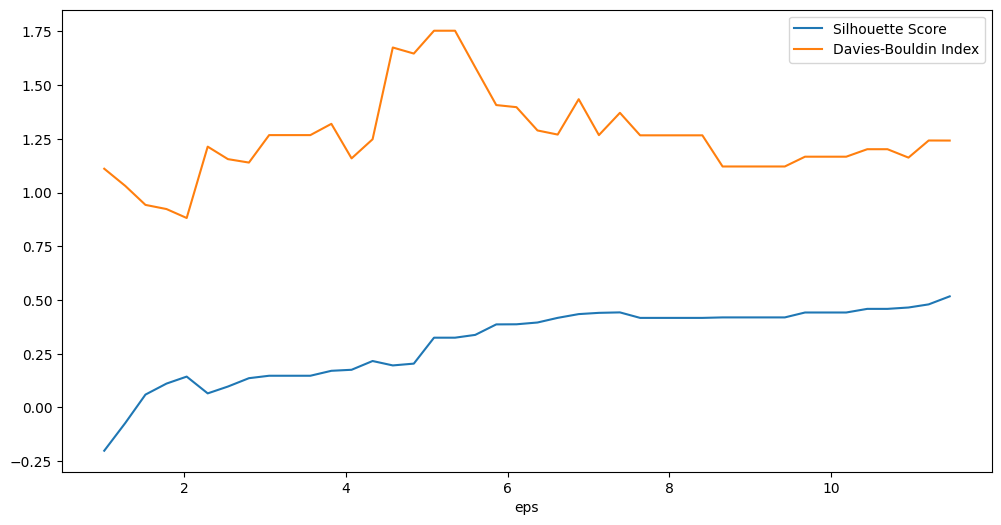

In [119]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

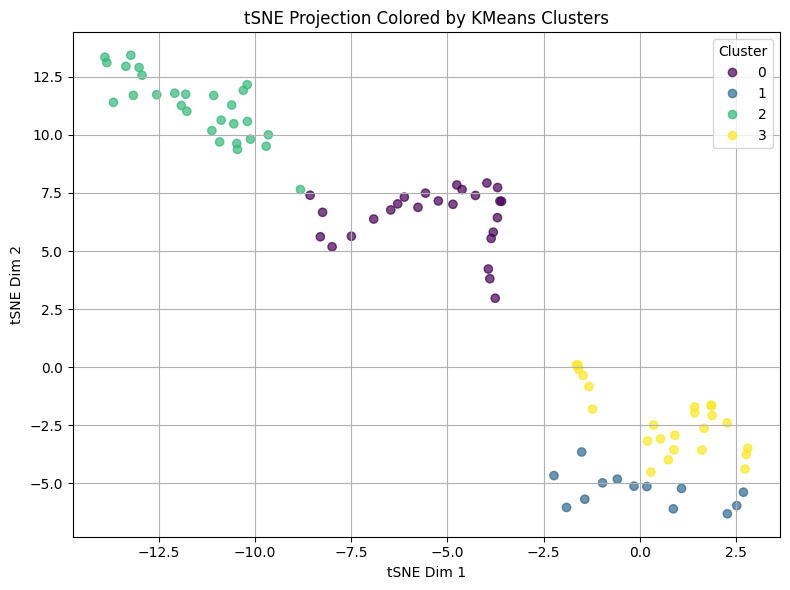

In [120]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        15    104          0.421461              0.458435
1   0.07            2        12     70          0.123360              0.603071
2   0.09            2         8     47         -0.032124              0.705994
3   0.11            2         5     33          0.087366              0.647806
4   0.13            2         4     22          0.199695              0.597817
5   0.15            2         5     12          0.182131              0.671322
6   0.17            2         2      8          0.571577              0.368001
7   0.19            2         1      6               NaN                   NaN
8   0.21            2         1      6               NaN                   NaN
9   0.22            2         1      6               NaN                   NaN
10  0.24            2         1      6               NaN                   NaN
11  0.26            2         1      6               NaN                   NaN
12  0.28            2         1      5               NaN                   NaN
13  0.30            2         1      5               NaN                   NaN
14  0.32            2         1      5               NaN                   NaN
15  0.34            2         1      4               NaN                   NaN
16  0.36            2         1      4               NaN                   NaN
17  0.38            2         1      3               NaN                   NaN
18  0.40            2         1      3               NaN                   NaN
19  0.42            2         1      3               NaN                   NaN
20  0.44            2         1      3               NaN                   NaN
21  0.46            2         1      3               NaN                   NaN
22  0.48            2         1      3               NaN                   NaN
23  0.50            2         1      3               NaN                   NaN
24  0.52            2         1      3               NaN                   NaN
25  0.53            2         1      3               NaN                   NaN
26  0.55            2         1      3               NaN                   NaN
27  0.57            2         1      3               NaN                   NaN
28  0.59            2         1      3               NaN                   NaN
29  0.61            2         1      3               NaN                   NaN
30  0.63            2         1      3               NaN                   NaN
31  0.65            2         2      1          0.818475              0.251980
32  0.67            2         2      1          0.818475              0.251980
33  0.69            2         1      1               NaN                   NaN
34  0.71            2         1      1               NaN                   NaN
35  0.73            2         1      1               NaN                   NaN
36  0.75            2         1      1               NaN                   NaN
37  0.77            2         1      1               NaN                   NaN
38  0.79            2         1      1               NaN                   NaN
39  0.81            2         1      1               NaN                   NaN
40  0.83            2         1      1               NaN                   NaN
41  0.84            2         1      1               NaN                   NaN
42  0.86            2         1      1               NaN                   NaN
43  0.88            2         1      1               NaN                   NaN
44  0.90            2         1      1               NaN                   NaN
45  0.92            2         1      1               NaN                   NaN
46  0.94            2         1      1               NaN                   NaN
47  0.96            2         1      1               NaN                   NaN
48  0.98            2         1      1               NaN                   NaN
49  1.00            2         1      1               Na

<Axes: xlabel='eps'>

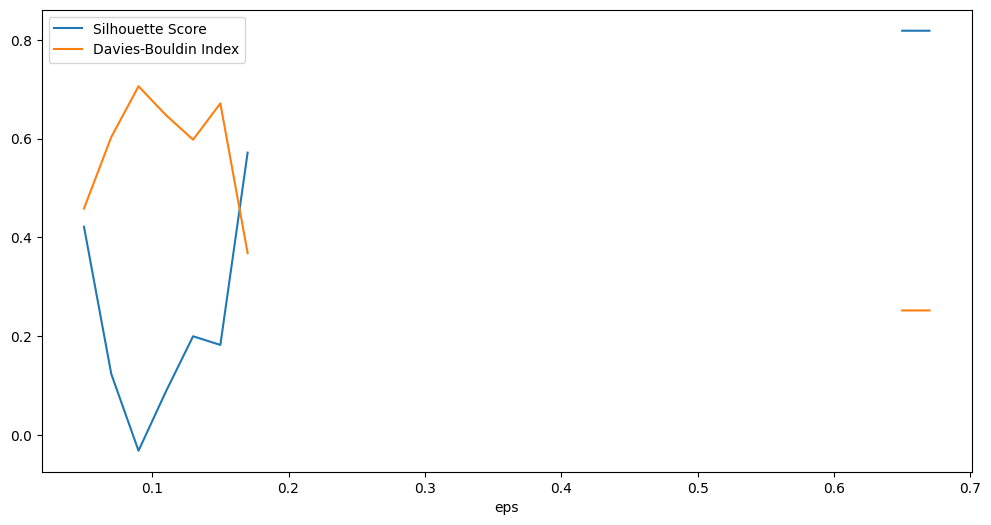

In [121]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [122]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [123]:
season = 4
season_year = 2005
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids] #this is where i lose dates
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2005-12-01 to 2006-02-28
Columns: 284 entries, 10000009 to 22000047
dtypes: float64(284)
memory usage: 200.4 KB


None

            10000009  10000010  10000011  10000014  10000016  11000011  \
2005-12-01  0.672526  0.723484  0.337862  0.621589  0.353989  1.266380   
2005-12-02  0.677498  0.736190  0.350274  0.650849  0.358635  1.266082   
2005-12-03  0.656233  0.736147  0.354000  0.629792  0.348921  1.249285   
2005-12-04  0.649489  0.731736  0.353446  0.601099  0.349615  1.227372   
2005-12-05  0.654421  0.784028  0.415105  0.631503  0.376507  1.218625   
...              ...       ...       ...       ...       ...       ...   
2006-02-24  0.971151  1.259008  1.111002  0.940380  0.698663  1.878294   
2006-02-25  0.913602  1.192300  0.938498  0.900368  0.613908  1.807713   
2006-02-26  0.849863  1.140802  0.766087  0.850968  0.570743  1.738256   
2006-02-27  0.802995  1.100137  0.660201  0.824065  0.540928  1.670056   
2006-02-28  0.792748  1.092403  0.613603  0.826840  0.541243  1.606272   

            11000016  13000011  13000019  13000065  ...  64000025  66000014  \
2005-12-01  1.250401  0.543375  

          2005-12-01  2005-12-02  2005-12-03  2005-12-04  2005-12-05  \
10000009   -0.058750   -0.058131   -0.057243   -0.057365   -0.060274   
10000010   -0.054388   -0.053119   -0.050410   -0.050390   -0.049359   
10000011   -0.087401   -0.086072   -0.083086   -0.082473   -0.080428   
10000014   -0.063111   -0.060406   -0.059504   -0.061469   -0.062204   
10000016   -0.086021   -0.085358   -0.083520   -0.082798   -0.083678   
...              ...         ...         ...         ...         ...   
7000003    -0.035516   -0.011923   -0.015302   -0.018557   -0.020047   
8000001    -0.045107   -0.029124   -0.030736   -0.032952   -0.035186   
9000001     0.023789    0.036387    0.011181   -0.001013   -0.005930   
9000015     0.018860    0.030389    0.007579   -0.003550   -0.008347   
22000047   -0.077967   -0.078134   -0.075730   -0.075130   -0.077788   

          2005-12-06  2005-12-07  2005-12-08  2005-12-09  2005-12-10  ...  \
10000009   -0.048735   -0.047755   -0.053023   -0.052741  

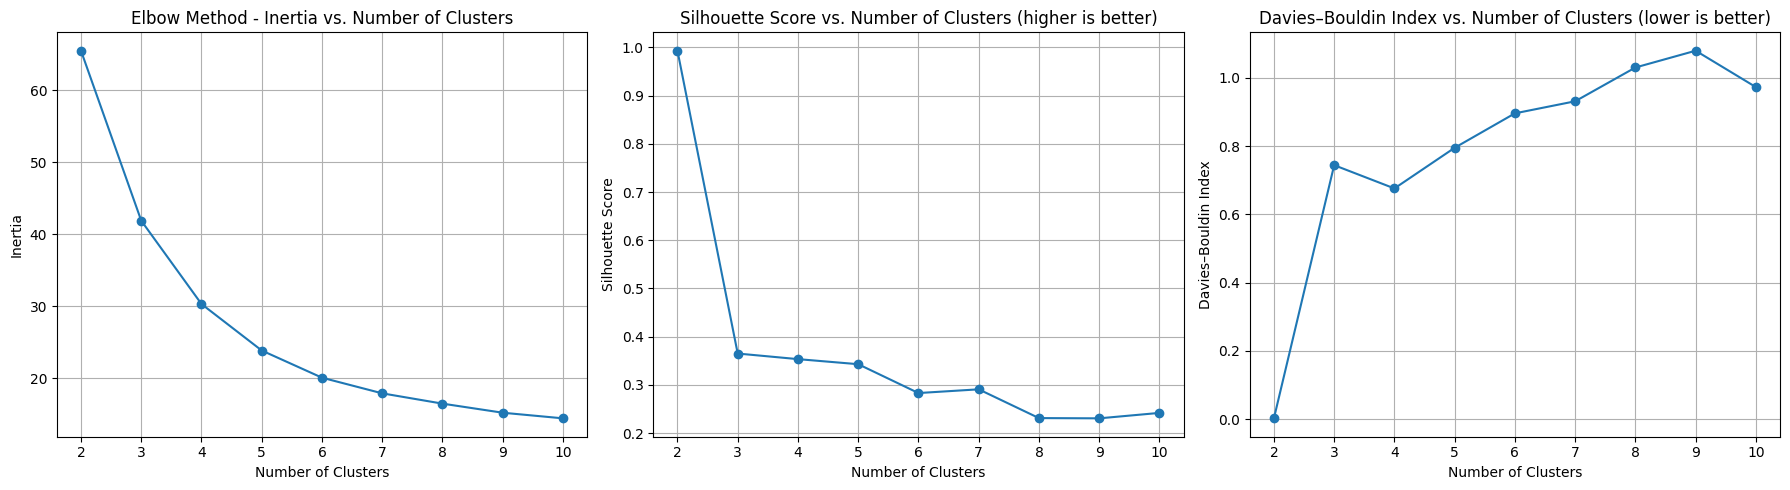

In [124]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
10000010        0
10000011        0
10000014        0
10000016        0

            10000009  10000010  10000011  10000014  10000016  11000011  \
2005-12-01  0.672526  0.723484  0.337862  0.621589  0.353989  1.266380   
2005-12-02  0.677498  0.736190  0.350274  0.650849  0.358635  1.266082   
2005-12-03  0.656233  0.736147  0.354000  0.629792  0.348921  1.249285   
2005-12-04  0.649489  0.731736  0.353446  0.601099  0.349615  1.227372   
2005-12-05  0.654421  0.784028  0.415105  0.631503  0.376507  1.218625   
...              ...       ...       ...       ...       ...       ...   
2006-02-24  0.971151  1.259008  1.111002  0.940380  0.698663  1.878294   
2006-02-25  0.913602  1.192300  0.938498  0.900368  0.613908  1.807713   
2006-02-26  0.849863  1.140802  0.766087  0.850968  0.570743  1.738256   
2006-02-27  0.802995  1.100137  0.660201  0.824065  0.540928  1.670056   
2006-02-28  0.792748  1.092403  0.613603  0.826840  0.541243  1.606272   

            11000016  13000011  13000019  13000065  ...  64000025  66000014  \
2005-12-01  1.250401  0.543375  

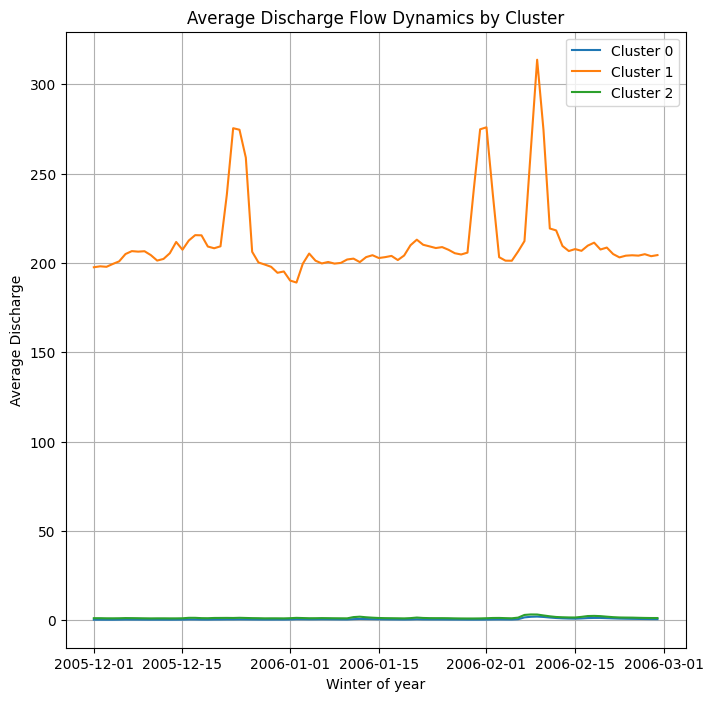

In [125]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [126]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [127]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  10000010  10000011  10000014  10000016  11000011  \
2005-12-01  0.672526  0.723484  0.337862  0.621589  0.353989  1.266380   
2005-12-02  0.677498  0.736190  0.350274  0.650849  0.358635  1.266082   
2005-12-03  0.656233  0.736147  0.354000  0.629792  0.348921  1.249285   
2005-12-04  0.649489  0.731736  0.353446  0.601099  0.349615  1.227372   
2005-12-05  0.654421  0.784028  0.415105  0.631503  0.376507  1.218625   
...              ...       ...       ...       ...       ...       ...   
2006-02-24  0.971151  1.259008  1.111002  0.940380  0.698663  1.878294   
2006-02-25  0.913602  1.192300  0.938498  0.900368  0.613908  1.807713   
2006-02-26  0.849863  1.140802  0.766087  0.850968  0.570743  1.738256   
2006-02-27  0.802995  1.100137  0.660201  0.824065  0.540928  1.670056   
2006-02-28  0.792748  1.092403  0.613603  0.826840  0.541243  1.606272   

            11000016  13000011  13000019  13000065  ...  64000025  66000014  \
2005-12-01  1.250401  0.543375  0.835281  0.854911  ...  0.037531  0.157251   
2005-12-02  1.449780  0.553502  0.845907  0.860036  ...  0.038833  0.148643   
2005-12-03  1.195755  0.548741  0.813018  0.834865  ...  0.039050  0.138281   
2005-12-04  1.040793  0.551462  0.799680  0.823345  ...  0.033409  0.137194   
2005-12-05  0.998887  0.572018  0.793698  0.816933  ...  0.033192  0.149134   
...              ...       ...       ...       ...  ...       ...       ...   
2006-02-24  1.339787  0.640261  0.966596  0.960442  ...  0.777300  0.655809   
2006-02-25  1.246737  0.610333  0.921707  0.903033  ...  0.726017  0.614656   
2006-02-26  1.154917  0.578366  0.885988  0.850569  ...  0.653585  0.569112   
2006-02-27  1.081705  0.548212  0.847541  0.812724  ...  0.613601  0.516665   
2006-02-28  1.078344  0.546776  0.847370  0.839109  ...  0.612706  0.471491   

            67000017  67000018  67000019   7000003   8000001   9000001  \
2005-12-01  0.170560  0.685769  0.383858  0.943917  0.831885  1.636642   
2005-12-02  0.170991  0.485271  0.360805  1.218643  1.017197  1.784401   
2005-12-03  0.145421  0.380251  0.349679  1.146748  0.966248  1.456477   
2005-12-04  0.140531  0.345844  0.385765  1.107076  0.937350  1.313940   
2005-12-05  0.145238  0.436261  0.437129  1.132092  0.952327  1.299724   
...              ...       ...       ...       ...       ...       ...   
2006-02-24  0.351386  0.862071  1.012736  1.214612  3.237367  1.653148   
2006-02-25  0.346015  0.826909  0.991562  1.023634  2.770013  1.598931   
2006-02-26  0.324042  0.772299  0.904787  0.791773  2.232562  1.567853   
2006-02-27  0.279526  0.735567  1.150710  0.653332  1.905473  1.541877   
2006-02-28  0.284190  0.996398  0.805576  0.605531  1.771844  1.572746   

             9000015  22000047  
2005-12-01  1.579061  0.448059  
2005-12-02  1.714150  0.443241  
2005-12-03  1.414344  0.440029  
2005-12-04  1.284030  0.440029  
2005-12-05  1.271033  0.446453  
...              ...       ...  
2006-02-24  1.594152  0.426315  
2006-02-25  1.544584  0.409298  
2006-02-26  1.516171  0.401033  
2006-02-27  1.492422  0.408498  
2006-02-28  1.520644  0.433511  

[90 rows x 284 columns]

<Axes: >

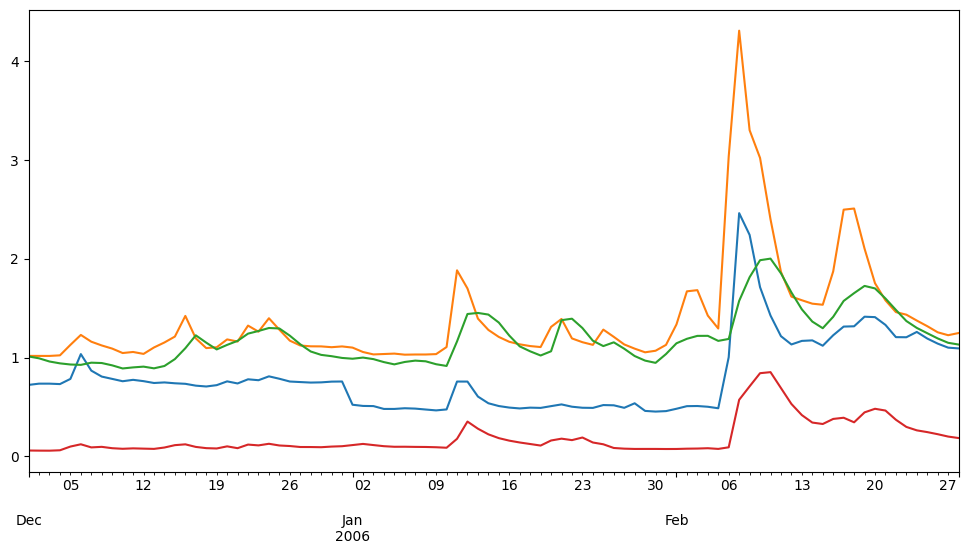

In [128]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

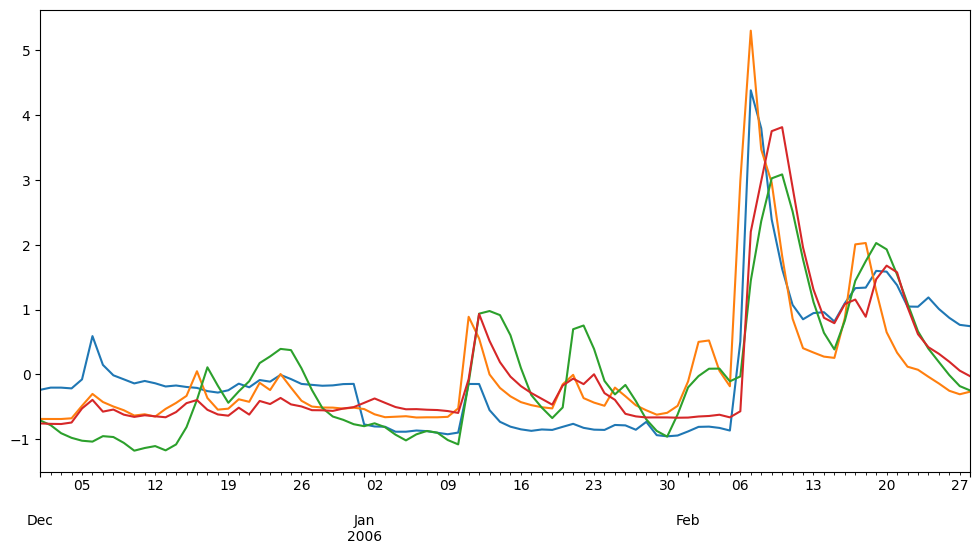

In [129]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

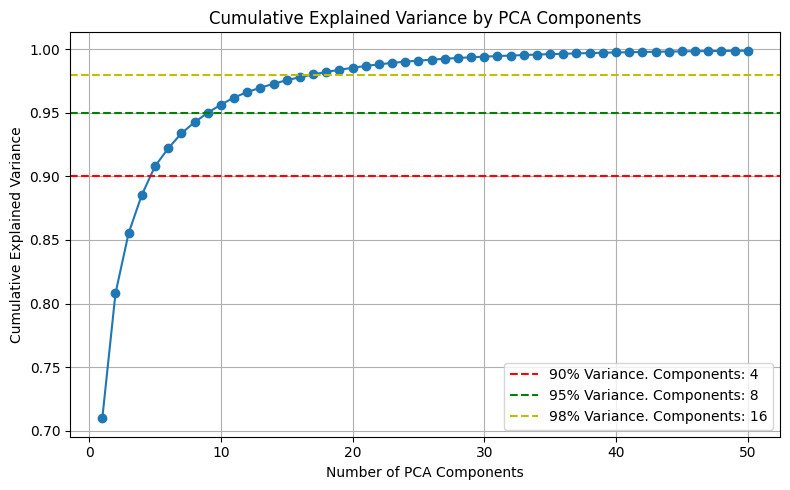

In [130]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [131]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ -9.80152044,   2.30184401,  -0.58056945, ...,  -0.64609356,
          0.53539622,   0.3061853 ],
       [ -9.89096029,   2.46587046,  -1.6096243 , ...,  -0.26041424,
          0.85023316,   0.3645102 ],
       [-11.12057613,   1.95684363,  -1.91059452, ...,  -0.19656698,
          0.37859524,   0.22184142],
       ...,
       [  1.99393526,  -7.23923845,  -4.35431267, ...,   0.43838066,
         -0.7691828 ,  -0.75963449],
       [ -0.05287766,  -7.09325035,  -4.13820842, ...,   0.52642157,
         -0.93096624,  -0.80043936],
       [ -0.66757704,  -6.14175869,  -3.90147464, ...,   0.49267317,
         -1.01344551,  -0.84265363]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_52112\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


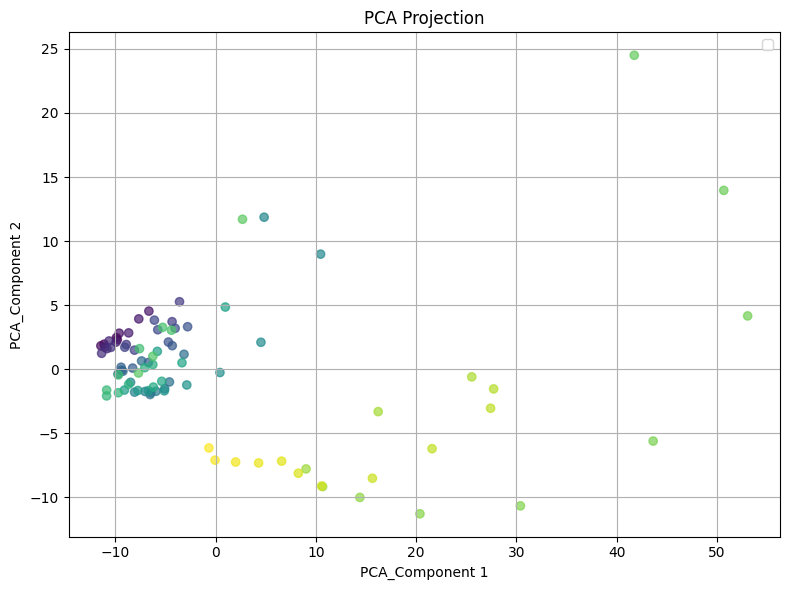

In [132]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_52112\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


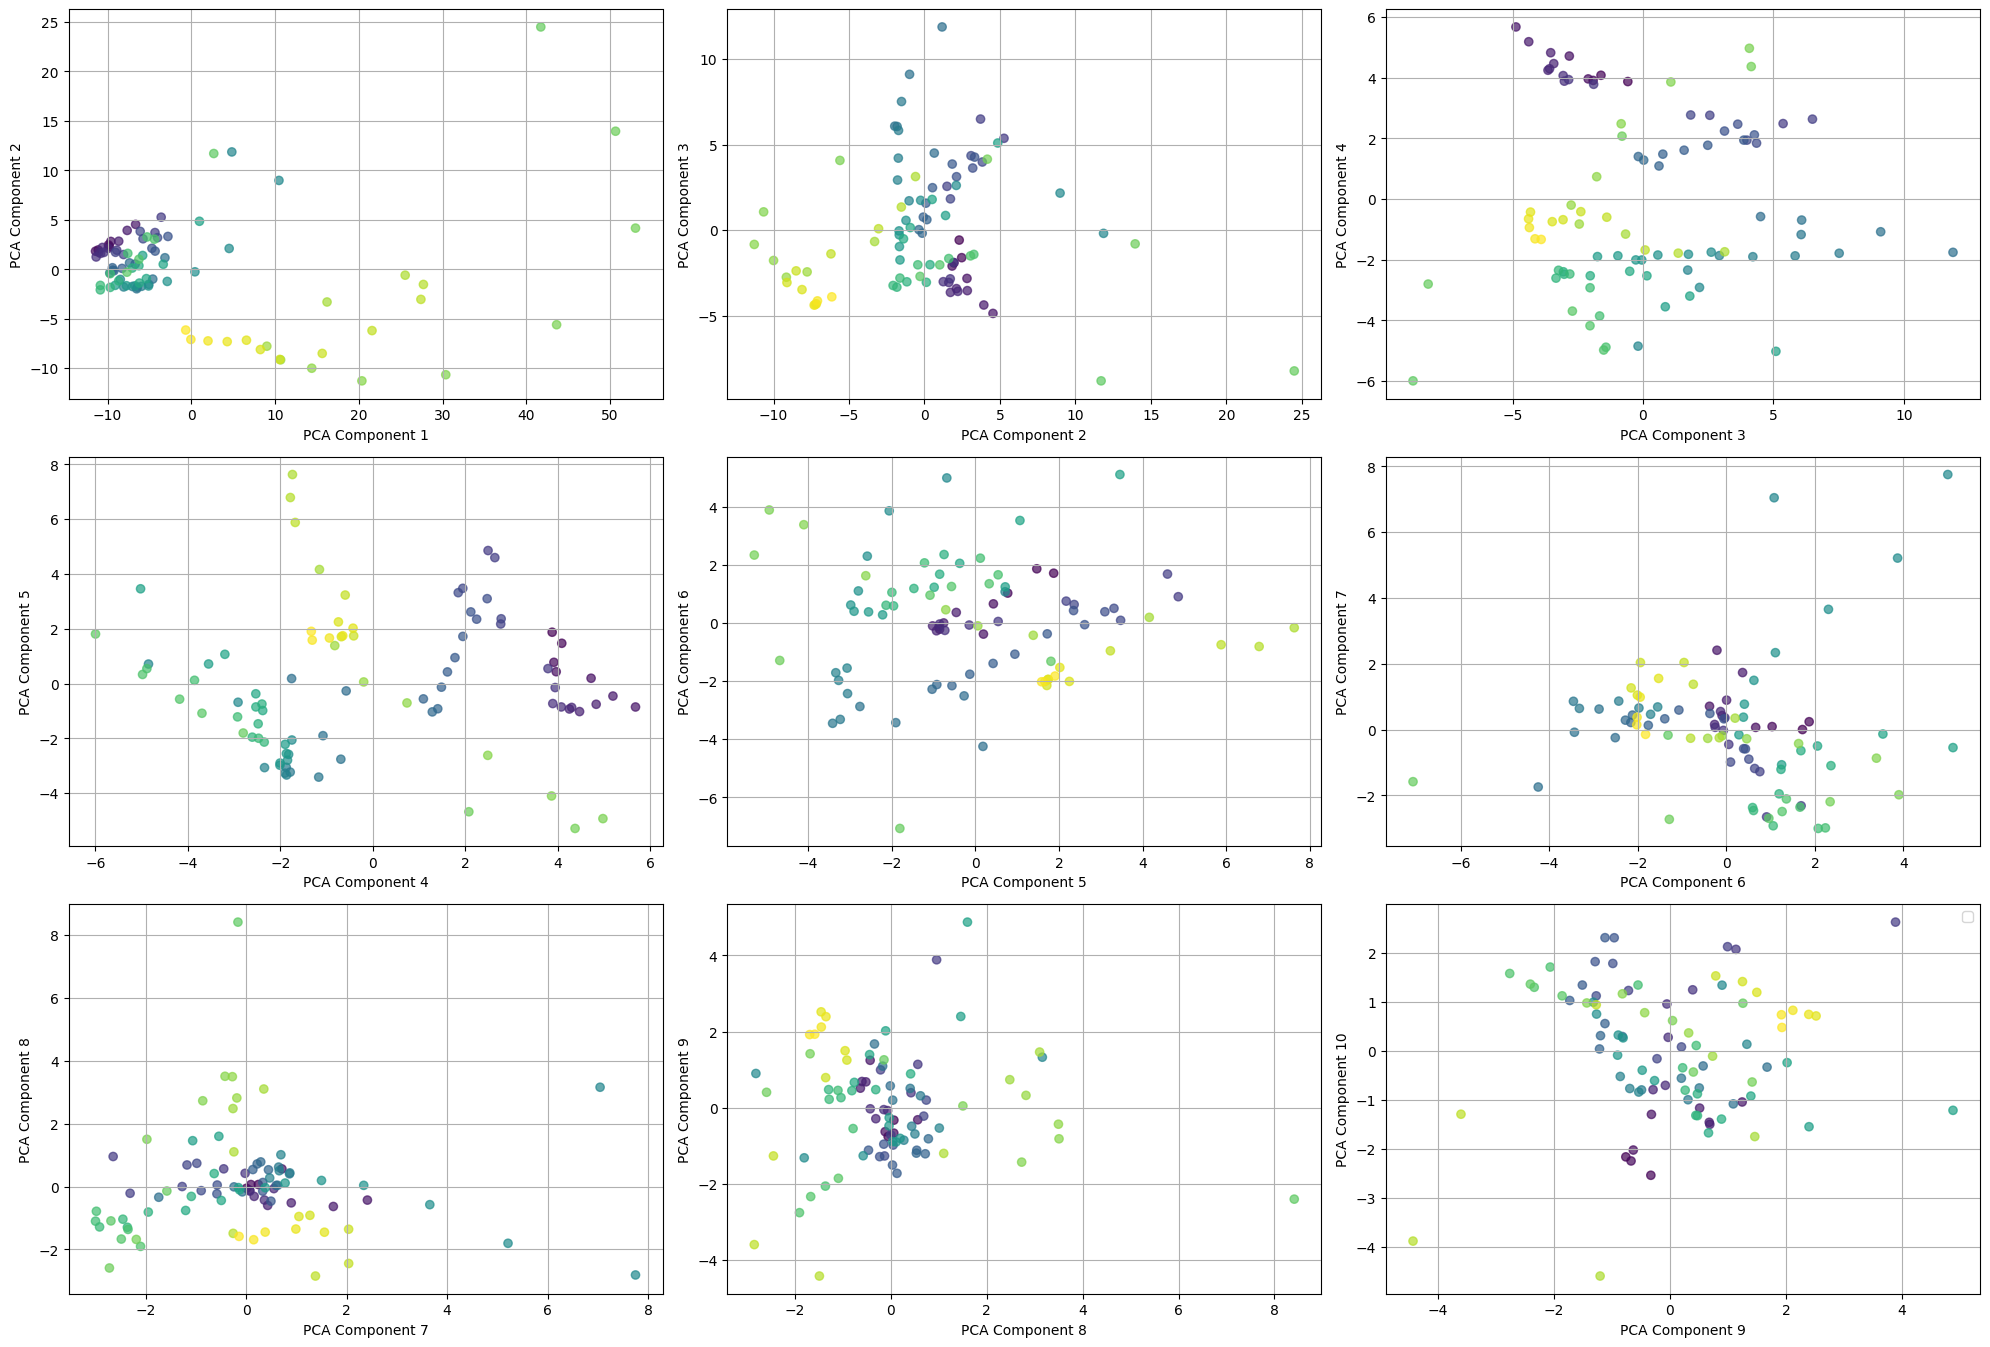

In [133]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [134]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.270
KMeans Davies-Bouldin Index is 1.331


<Axes: xlabel='k'>

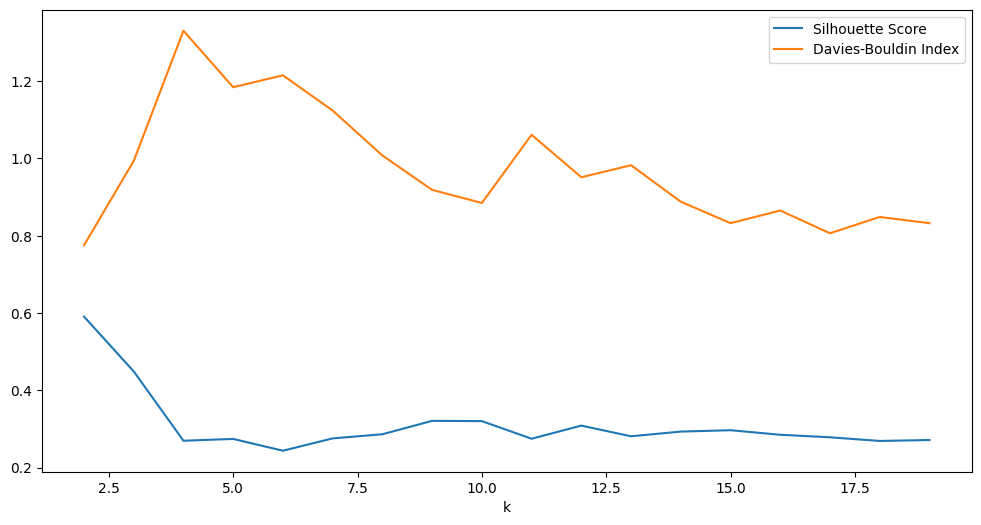

In [135]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         0     90               NaN   
2    1.01            3         0     90               NaN   
3    1.27            3         0     90               NaN   
4    1.52            3         1     87               NaN   
5    1.78            3         1     87               NaN   
6    2.03            3         4     76         -0.213775   
7    2.29            3         6     67         -0.126651   
8    2.54            3         8     58         -0.109096   
9    2.80            3         8     46         -0.006431   
10   3.05            3         8     40          0.057995   
11   3.31            3         7     37          0.083508   
12   3.56            3         8     30          0.157889   
13   3.82            3         8     30          0.157889   
14   4.07            3         8     30          0.157889   
15   4.33            3         5     26          0.141818   
16   4.58            3         5     22          0.138265   
17   4.84            3         5     22          0.138265   
18   5.09            3         4     22          0.136245   
19   5.35            3         4     21          0.142987   
20   5.60            3         4     20          0.139502   
21   5.86            3         3     17          0.195282   
22   6.11            3         2     16          0.385627   
23   6.37            3         2     16          0.385627   
24   6.62            3         2     16          0.385627   
25   6.88            3         2     16          0.385627   
26   7.13            3         2     16          0.385627   
27   7.39            3         2     14          0.414530   
28   7.64            3         2     13          0.429413   
29   7.90            3         2     13          0.429413   
30   8.15            3         2     13          0.429413   
31   8.41            3         3     10          0.417069   
32   8.66            3         2     10          0.454262   
33   8.92            3         2     10          0.454262   
34   9.17            3         2     10          0.454262   
35   9.43            3         2      9          0.460994   
36   9.68            3         2      8          0.474531   
37   9.94            3         2      8          0.474531   
38  10.19            3         2      8          0.474531   
39  10.45            3         1      8               NaN   
40  10.70            3         1      7               NaN   
41  10.96            3         1      7               NaN   
42  11.21            3         1      6               NaN   
43  11.47            3         1      6               NaN   
44  11.72            3         1      6               NaN   
45  11.98            3         1      6               NaN   
46  12.23            3         1      5               NaN   
47  12.49            3         1      5               NaN   
48  12.74            3         1      5               NaN   
49  13.00            3         1      5               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4                    NaN  
5                    NaN  
6               1.336924  
7               1.294792  
8               1.401004  
9               1.395064  
10              1.331458  
11              1.435528  
12              1.238381  
13              1.238381  
14              1.238381  
15              1.379273  
16              1.512110  
17              1.512110  
18              1.624214  
19              1.605857  
20              1.622944  
21              1.580407  
22              1.201842  
23              1.201842  
24              1.201842  
25              1.201842  
26              1.201842  
27              1.322218  
28              1.186422  
29              1.186422  
30              1.186422  
31              1.700220  
32 

<Axes: xlabel='eps'>

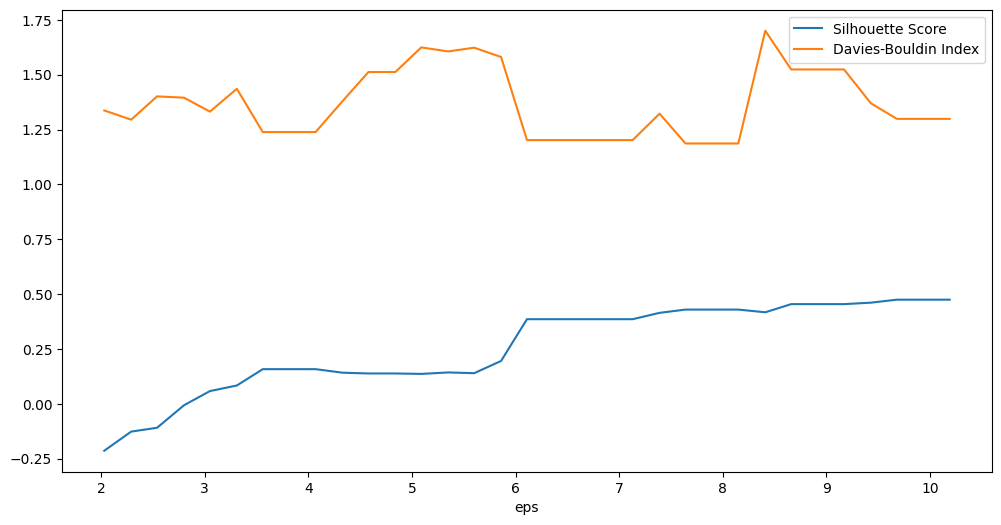

In [136]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

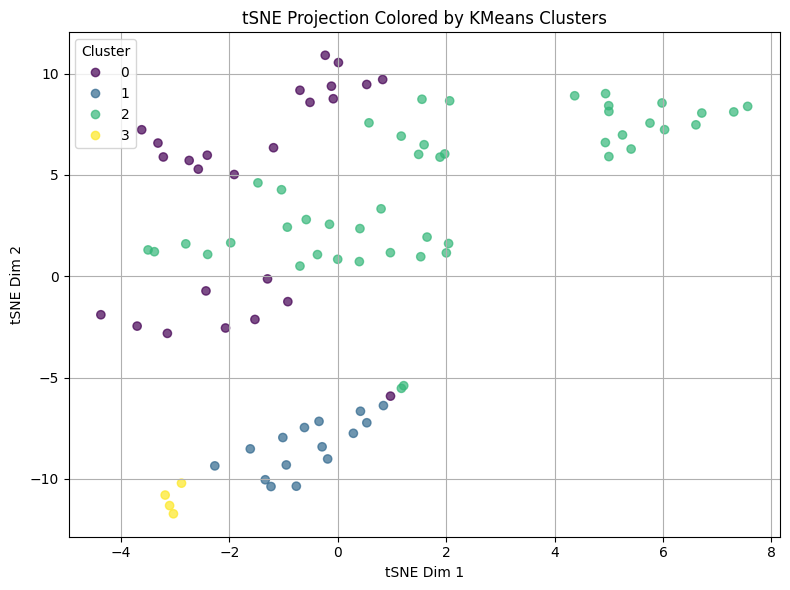

In [137]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        29    208          0.597245   
1    0.05            2        31    191          0.534830   
2    0.06            2        29    177          0.459810   
3    0.06            2        30    158          0.463898   
4    0.07            2        35    131          0.359664   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      1          0.776254   
196  0.99            2         2      1          0.776254   
197  0.99            2         2      1          0.776254   
198  1.00            2         2      1          0.776254   
199  1.00            2         2      1          0.776254   

     Davies-Bouldin Index  
0                0.439078  
1                0.502901  
2                0.610130  
3                0.526816  
4                0.570381  
..                    ...  
195              0.354450  
196              0.354450  
197              0.354450  
198              0.354450  
199              0.354450  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

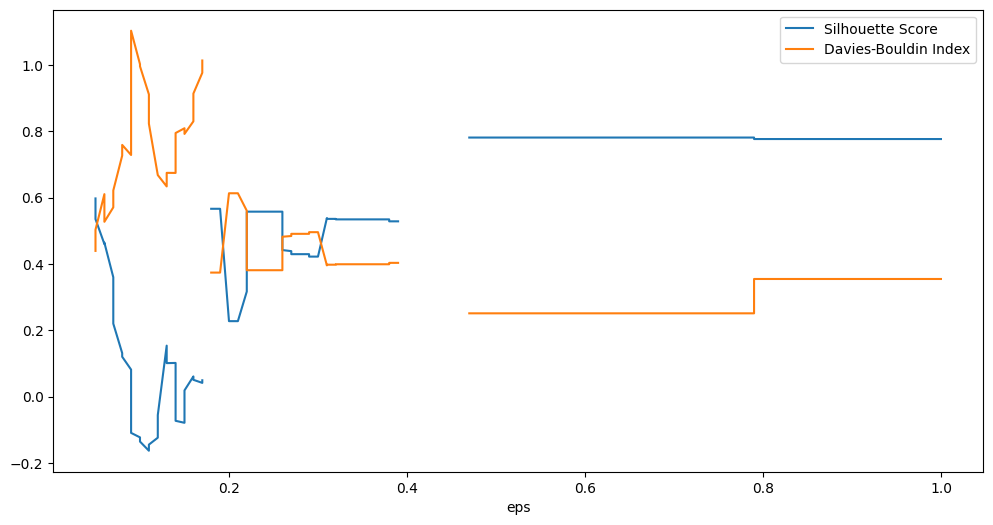

In [138]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))